In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    df.ffill(inplace=True)
    df.bfill(inplace=True)

    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Print the head of the aggregated data before normalization
    print("Aggregated building data before normalization:\n", building_data_combined.head())

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler


# Example usage
directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
file_structure = {
    'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
    'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
    'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
    'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
    'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
    'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
    'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
}

building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
print(building_hourly_consumption.head())


Aggregated building data before normalization:
                      Floor1_total_building_kW  Floor1_total_building_kW  \
2018-07-01 00:00:00                       0.0                   5265.43   
2018-07-01 01:00:00                       0.0                   5265.43   
2018-07-01 02:00:00                       0.0                   5265.43   
2018-07-01 03:00:00                       0.0                   5265.43   
2018-07-01 04:00:00                       0.0                   5265.43   

                     Floor2_total_building_kW  Floor2_total_building_kW  \
2018-07-01 00:00:00                       0.0                    363.49   
2018-07-01 01:00:00                       0.0                    363.49   
2018-07-01 02:00:00                       0.0                    363.49   
2018-07-01 03:00:00                       0.0                    363.49   
2018-07-01 04:00:00                       0.0                    363.49   

                     Floor3_total_building_kW  Flo

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    df.ffill(inplace=True)
    df.bfill(inplace=True)

    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    df_power = df_power.dropna(axis=1, how='all')

    #df_power.fillna(0, inplace=True)

    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    building_data_combined = building_data_combined.reindex(complete_date_range)

    building_data_combined.fillna(0, inplace=True)

    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    #print("Aggregated building data before normalization:\n", building_data_combined.head())

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler


# Example usage
directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
file_structure = {
    'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
    'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
    'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
    'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
    'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
    'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
    'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
}

building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
print(building_hourly_consumption.head())


Total rows in aggregated data: 13153
                     total_building_kW  hour  weekday  month
2018-07-01 00:00:00           -0.52963     0        6      7
2018-07-01 01:00:00           -0.52963     1        6      7
2018-07-01 02:00:00           -0.52963     2        6      7
2018-07-01 03:00:00           -0.52963     3        6      7
2018-07-01 04:00:00           -0.52963     4        6      7


In [ ]:
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Replace any remaining NaNs with 0
    df_power.fillna(0, inplace=True)

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Replace any remaining NaNs with 0 after reindexing
    building_data_combined.fillna(0, inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Print the head of the aggregated data before normalization
    print("Aggregated building data before normalization:\n", building_data_combined.head())

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
file_structure = {
    'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
    'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
    'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
    'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
    'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
    'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
    'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
}

building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
print(building_hourly_consumption.head())


Aggregated building data before normalization:
                      Floor1_total_building_kW  Floor1_total_building_kW  \
2018-07-01 00:00:00                       0.0                       0.0   
2018-07-01 01:00:00                       0.0                       0.0   
2018-07-01 02:00:00                       0.0                       0.0   
2018-07-01 03:00:00                       0.0                       0.0   
2018-07-01 04:00:00                       0.0                       0.0   

                     Floor2_total_building_kW  Floor2_total_building_kW  \
2018-07-01 00:00:00                       0.0                       0.0   
2018-07-01 01:00:00                       0.0                       0.0   
2018-07-01 02:00:00                       0.0                       0.0   
2018-07-01 03:00:00                       0.0                       0.0   
2018-07-01 04:00:00                       0.0                       0.0   

                     Floor3_total_building_kW  Flo

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [ ]:
print(building_hourly_consumption.tail())


                     total_building_kW  hour  weekday  month
2019-12-30 20:00:00           0.085431    20        0     12
2019-12-30 21:00:00           0.085431    21        0     12
2019-12-30 22:00:00           0.085431    22        0     12
2019-12-30 23:00:00           0.085431    23        0     12
2019-12-31 00:00:00           0.085431     0        1     12


Linear Regression Univariate.

MAE: 1204.82
RMSE: 3016.68
R2 Score: 0.88


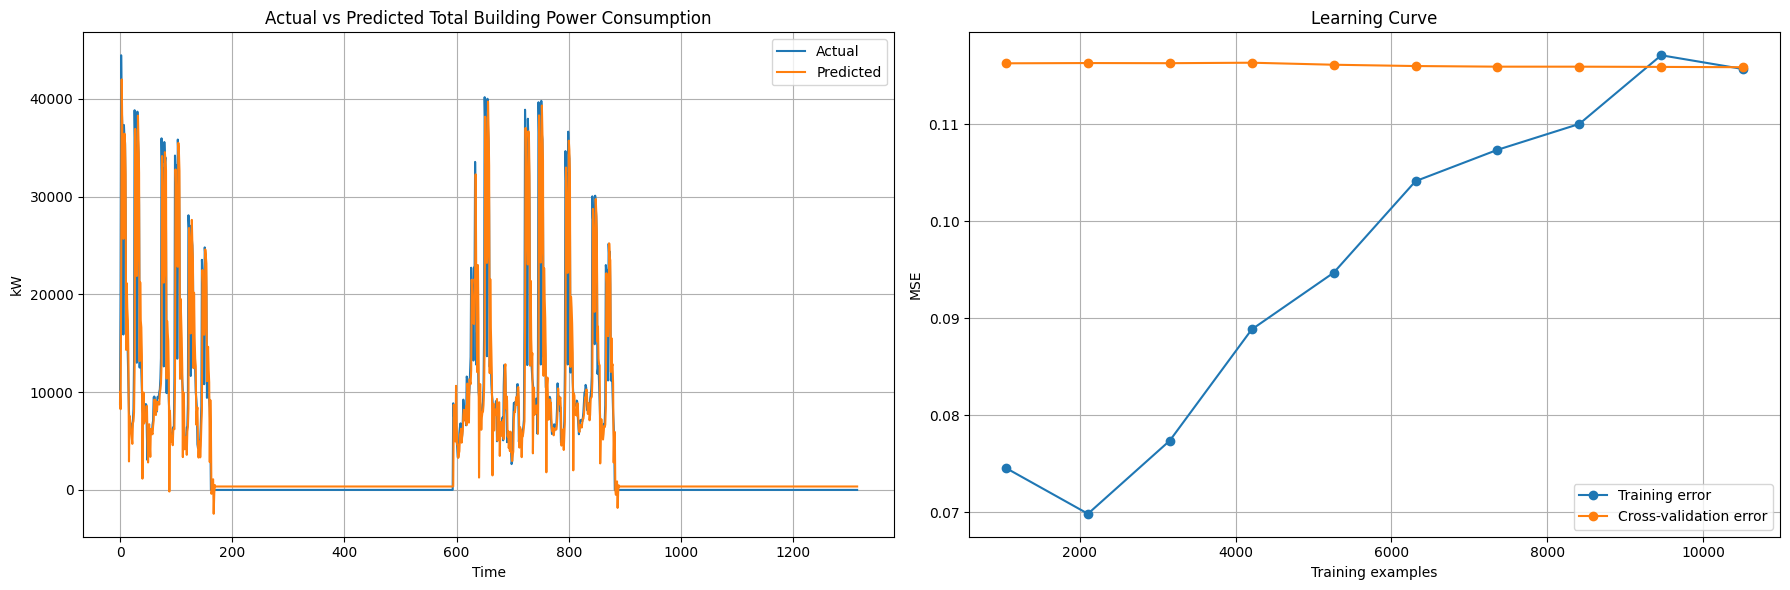

In [ ]:
def create_lagged_features(df, lag=8):
    lagged_features = []
    for i in range(1, lag + 1):
        lagged_cols = []
        for col in df.columns:
            lagged_cols.append(df[col].shift(i).rename(f'{col}_lag_{i}'))
        lagged_features.append(pd.concat(lagged_cols, axis=1))
    lagged_df = pd.concat([df] + lagged_features, axis=1)
    lagged_df.dropna(inplace=True)
    return lagged_df
def linear_regression_power_only(df, lag=8, train_size=0.9, scaler=None, plot=True):
    # Create lagged features for total_building_kW
    df_lagged = create_lagged_features(df, lag=lag)

    # Separate features and target variable
    lagged_power_features = [f'total_building_kW_lag_{i}' for i in range(1, lag+1)]
    X = df_lagged[lagged_power_features]
    y = df_lagged['total_building_kW']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=False)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Use provided scaler or create a new one
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(df[['total_building_kW']])  # Fit scaler on the original unscaled data

    # Inverse scaling for evaluation metrics
    y_test_inv = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    # Print evaluation metrics
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    # Plot actual vs predicted values if plot=True
    if plot:
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        # Plot actual vs predicted values
        ax1.plot(y_test_inv, label='Actual')
        ax1.plot(y_pred_inv, label='Predicted')
        ax1.set_title('Actual vs Predicted Total Building Power Consumption')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('kW')
        ax1.legend()
        ax1.grid(True)

        # Plot learning curve
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
        )
        train_scores_mean = -np.mean(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)
        ax2.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
        ax2.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation error')
        ax2.set_title('Learning Curve')
        ax2.set_xlabel('Training examples')
        ax2.set_ylabel('MSE')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    return model, scaler


model_power_only, scaler = linear_regression_power_only(building_hourly_consumption, scaler=scaler)



MAE: 1156.76
RMSE: 3008.85
R2 Score: 0.88


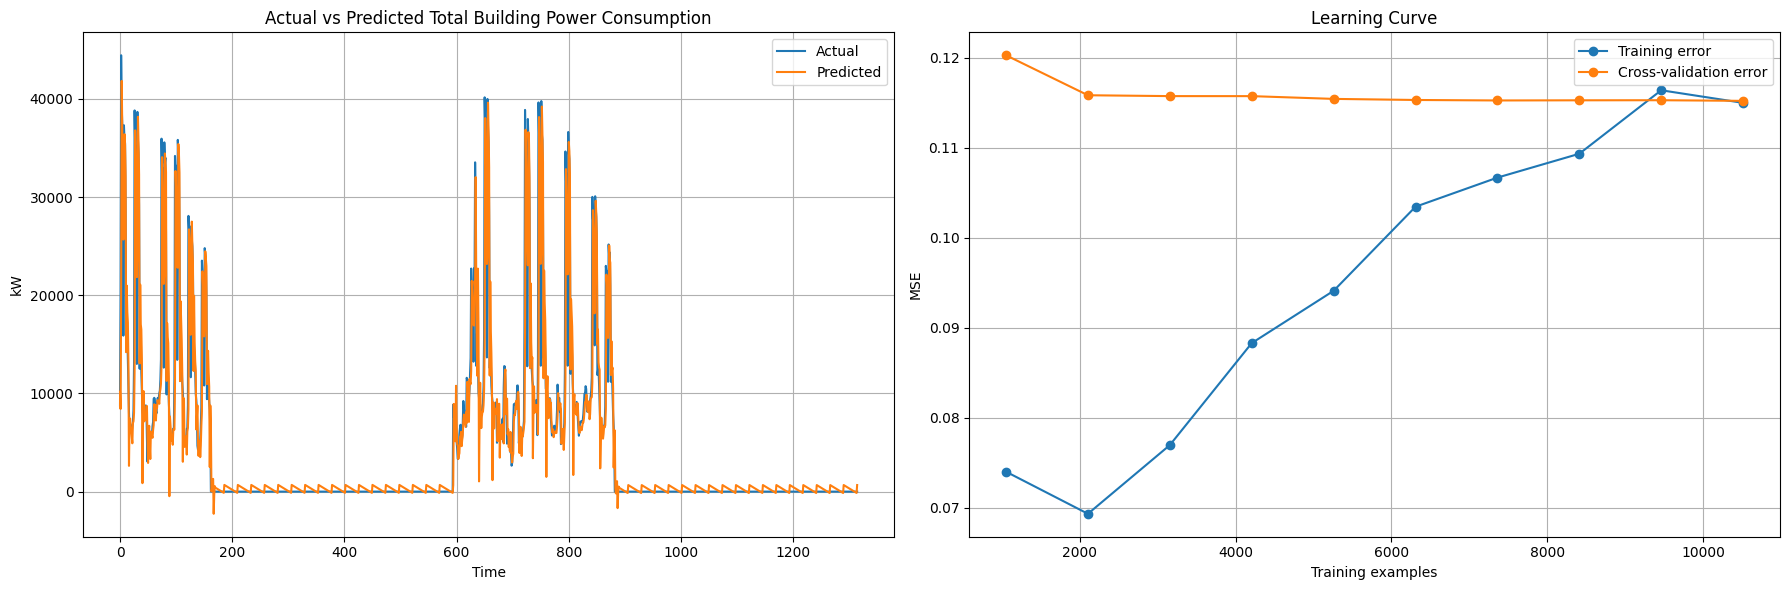

In [ ]:
def create_lagged_features(df, lag=8):
    lagged_features = []
    for i in range(1, lag + 1):
        lagged_cols = []
        for col in df.columns:
            lagged_cols.append(df[col].shift(i).rename(f'{col}_lag_{i}'))
        lagged_features.append(pd.concat(lagged_cols, axis=1))
    lagged_df = pd.concat([df] + lagged_features, axis=1)
    lagged_df.dropna(inplace=True)
    return lagged_df

def linear_regression_multivariate(df, lag=8, train_size=0.9, scaler=None, plot=True):
    # Create lagged features for total_building_kW
    df_lagged = create_lagged_features(df[['total_building_kW']], lag=lag)

    # Add temporal features
    df_lagged['hour'] = df['hour']
    df_lagged['weekday'] = df['weekday']
    df_lagged['month'] = df['month']

    # Separate features and target variable
    lagged_power_features = [f'total_building_kW_lag_{i}' for i in range(1, lag+1)]
    temporal_features = ['hour', 'weekday', 'month']
    X = df_lagged[lagged_power_features + temporal_features]
    y = df_lagged['total_building_kW']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=False)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Use provided scaler or create a new one
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(df[['total_building_kW']])  # Fit scaler on the original unscaled data

    # Inverse scaling for evaluation metrics
    y_test_inv = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    # Print evaluation metrics
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    # Plot actual vs predicted values if plot=True
    if plot:
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        # Plot actual vs predicted values
        ax1.plot(y_test_inv, label='Actual')
        ax1.plot(y_pred_inv, label='Predicted')
        ax1.set_title('Actual vs Predicted Total Building Power Consumption')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('kW')
        ax1.legend()
        ax1.grid(True)

        # Plot learning curve
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
        )
        train_scores_mean = -np.mean(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)
        ax2.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
        ax2.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation error')
        ax2.set_title('Learning Curve')
        ax2.set_xlabel('Training examples')
        ax2.set_ylabel('MSE')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    return model, scaler

# Usage example
model_multivariate, scaler = linear_regression_multivariate(building_hourly_consumption, scaler=scaler)

**CNN-LSTM Univariate model**

Epoch 1/80, Train Loss: 0.42418307245495807, Val Loss: 0.2456577867269516
Epoch 2/80, Train Loss: 0.20359518486692244, Val Loss: 0.18677746843207965
Epoch 3/80, Train Loss: 0.16831121809152236, Val Loss: 0.168238911439072
Epoch 4/80, Train Loss: 0.153538086956524, Val Loss: 0.15701401301405646
Epoch 5/80, Train Loss: 0.14776340495032, Val Loss: 0.15695848248221658
Epoch 6/80, Train Loss: 0.14340856366128807, Val Loss: 0.14502473581920972
Epoch 7/80, Train Loss: 0.14070619633757925, Val Loss: 0.13826232945377176
Epoch 8/80, Train Loss: 0.13380556225956206, Val Loss: 0.13172389871694826
Epoch 9/80, Train Loss: 0.1312223307519074, Val Loss: 0.12706262821500952
Epoch 10/80, Train Loss: 0.1272144274539258, Val Loss: 0.12848150052807547
Epoch 11/80, Train Loss: 0.12638867754175, Val Loss: 0.12279525060545314
Epoch 12/80, Train Loss: 0.12247071635112705, Val Loss: 0.1246470839462497
Epoch 13/80, Train Loss: 0.11983737044305687, Val Loss: 0.12068342112682083
Epoch 14/80, Train Loss: 0.11959293

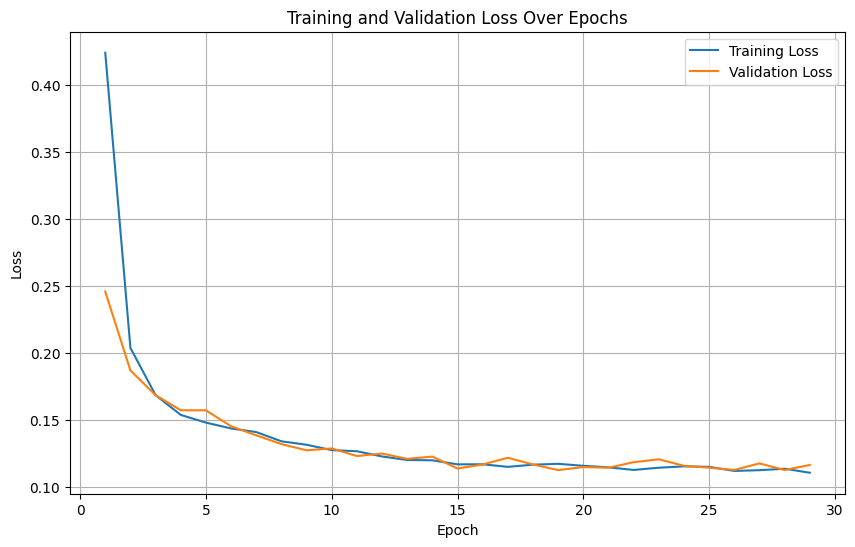

Mean Absolute Error: 1112.1995849609375
Root Mean Squared Error: 3559.225341796875
R2 Score: 0.8096535239846935


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    return building_data_combined_scaled, scaler

# Create lagged features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# CNN-LSTM model
class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.lstm1 = nn.LSTM(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=lstm_hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=lstm_hidden_size, hidden_size=lstm_hidden_size, batch_first=True)
        self.fc = nn.Linear(lstm_hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function with learning curve
def train_model(model, train_loader, val_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []  # List to store training losses
    val_losses = []  # List to store validation losses

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)  # Store the average loss for this epoch

        # Validation loss
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)  # Store the average validation loss for this epoch

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')

        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }
    building_data_combined_scaled, scaler = aggregate_building_data(directory, file_structure)
    lagged_df = create_lagged_features(building_data_combined_scaled)

    # Splitting data into train, validation, and test sets
    train_val_size = 0.9
    train_size = 0.8889  # 0.8 / 0.9 to maintain the 0.8 split from the 90% train_val_data

    train_val_data, test_data = train_test_split(lagged_df, train_size=train_val_size, shuffle=False)
    train_data, val_data = train_test_split(train_val_data, train_size=train_size, shuffle=False)

    train_dataset = PowerConsumptionDataset(train_data)
    val_dataset = PowerConsumptionDataset(val_data)
    test_dataset = PowerConsumptionDataset(test_data)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Define and train the model
    input_dim = train_data.shape[1] - 1  # Exclude the target column
    model = CNN_LSTM(input_dim=input_dim, cnn_out_channels=2, cnn_kernel_size=2, lstm_hidden_size=100)
    train_model(model, train_loader, val_loader, epochs=80, lr=0.001, patience=10)

    # Load the best model and evaluate
    model.load_state_dict(torch.load('best_model.pth'))
    evaluate_model(model, test_loader, scaler)

if __name__ == '__main__':
    main()


**CNN-GRU Univariate model**


Total rows in aggregated data: 13153
                     total_building_kW
2018-07-01 00:00:00          -0.816607
2018-07-01 01:00:00          -0.816607
2018-07-01 02:00:00          -0.816607
2018-07-01 03:00:00          -0.816607
2018-07-01 04:00:00          -0.816607
Epoch 1/50, Loss: 0.2980708550381404
Epoch 2/50, Loss: 0.1621200232416071
Epoch 3/50, Loss: 0.1227773730392738
Epoch 4/50, Loss: 0.11738302642779966
Epoch 5/50, Loss: 0.1150254289950094
Epoch 6/50, Loss: 0.11755522797184606
Epoch 7/50, Loss: 0.11292800275228357
Epoch 8/50, Loss: 0.11196033800801923
Epoch 9/50, Loss: 0.11264081723907943
Epoch 10/50, Loss: 0.10957382923813276
Epoch 11/50, Loss: 0.10901740433708314
Epoch 12/50, Loss: 0.10844068293289472
Epoch 13/50, Loss: 0.1064398867148225
Epoch 14/50, Loss: 0.10607721444259408
Epoch 15/50, Loss: 0.10832370609365484
Epoch 16/50, Loss: 0.10523086465815062
Epoch 17/50, Loss: 0.10595818713147154
Epoch 18/50, Loss: 0.10478855457196953
Epoch 19/50, Loss: 0.10478607080476258
Ep

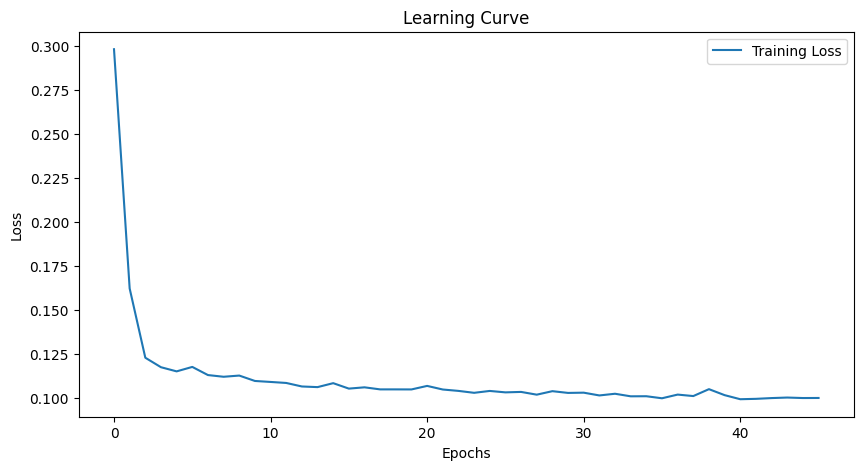

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    return building_data_combined_scaled, scaler

# Create lagged features for univariate time series
def create_lagged_features_univariate(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class for univariate time series
class PowerConsumptionDatasetUnivariate(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# CNN-GRU model for univariate time series
class CNN_GRU_Univariate(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size):
        super(CNN_GRU_Univariate, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size, hidden_size=gru_hidden_size, batch_first=True)
        self.fc = nn.Linear(gru_hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function with early stopping and learning curve
def train_model(model, train_loader, epochs=50, lr=0.001, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    best_loss = float('inf')
    patience_counter = 0
    train_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    return train_losses

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }

    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
    print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
    print(building_hourly_consumption.head())

    # Create lagged features and prepare datasets for univariate time series
    lagged_df = create_lagged_features_univariate(building_hourly_consumption)
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    train_dataset = PowerConsumptionDatasetUnivariate(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    test_dataset = PowerConsumptionDatasetUnivariate(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Initialize model for univariate time series
    input_dim = X.shape[1]  # Number of input features (lagged features + temporal features)
    cnn_out_channels = 32
    cnn_kernel_size = 3
    gru_hidden_size = 64

    model = CNN_GRU_Univariate(input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size)

    # Train model
    train_losses = train_model(model, train_loader)

    # Evaluate model
    evaluate_model(model, test_loader, scaler)

    # Plot learning curve
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


**CNN-GRU multivariate model**.

Total rows in aggregated data: 13153
                     total_building_kW  hour  weekday  month
2018-07-01 00:00:00          -0.816607     0        6      7
2018-07-01 01:00:00          -0.816607     1        6      7
2018-07-01 02:00:00          -0.816607     2        6      7
2018-07-01 03:00:00          -0.816607     3        6      7
2018-07-01 04:00:00          -0.816607     4        6      7
Epoch 1/50, Loss: 0.2201348801934591
Epoch 2/50, Loss: 0.12928552484960967
Epoch 3/50, Loss: 0.11274396748312059
Epoch 4/50, Loss: 0.11287929646430477
Epoch 5/50, Loss: 0.1044252957067182
Epoch 6/50, Loss: 0.10276158166027838
Epoch 7/50, Loss: 0.09963441968605083
Epoch 8/50, Loss: 0.09634864402394142
Epoch 9/50, Loss: 0.09737975418727884
Epoch 10/50, Loss: 0.0970950127449087
Epoch 11/50, Loss: 0.09702051523071463
Epoch 12/50, Loss: 0.09287396101381189
Epoch 13/50, Loss: 0.09192928932206605
Epoch 14/50, Loss: 0.09309689540375946
Epoch 15/50, Loss: 0.08765106712297727
Epoch 16/50, Loss: 0.088

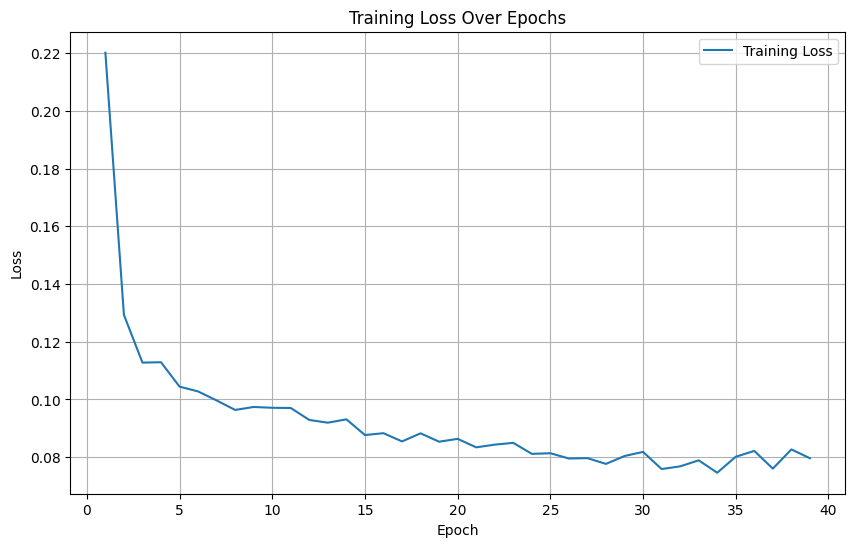

Mean Absolute Error: 953.59228515625
Root Mean Squared Error: 2303.9111328125
R2 Score: 0.9202436443149933


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# CNN-GRU model
class CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size):
        super(CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size, hidden_size=gru_hidden_size, batch_first=True)
        self.fc = nn.Linear(gru_hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function with learning curve
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []  # List to store training losses

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)  # Store the average loss for this epoch
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }

    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
    print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
    print(building_hourly_consumption.head())

    # Create lagged features and prepare datasets
    lagged_df = create_lagged_features(building_hourly_consumption)
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    train_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    test_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Initialize model
    input_dim = X.shape[1]  # Number of input features
    cnn_out_channels = 32
    cnn_kernel_size = 3
    gru_hidden_size = 64

    model = CNN_GRU(input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size)

    # Train model
    train_model(model, train_loader)

    # Evaluate model
    evaluate_model(model, test_loader, scaler)

if __name__ == "__main__":
    main()


Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 2, 'gru_hidden_size': 50, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.9176, Validation Loss: 4.4251
Epoch 2/50, Train Loss: 3.2603, Validation Loss: 2.6519
Epoch 3/50, Train Loss: 2.9655, Validation Loss: 2.8033
Epoch 4/50, Train Loss: 2.9133, Validation Loss: 2.9619
Epoch 5/50, Train Loss: 2.8909, Validation Loss: 3.0139
Epoch 6/50, Train Loss: 2.8874, Validation Loss: 2.9652
Epoch 7/50, Train Loss: 2.8659, Validation Loss: 3.0287
Early stopping at epoch 7


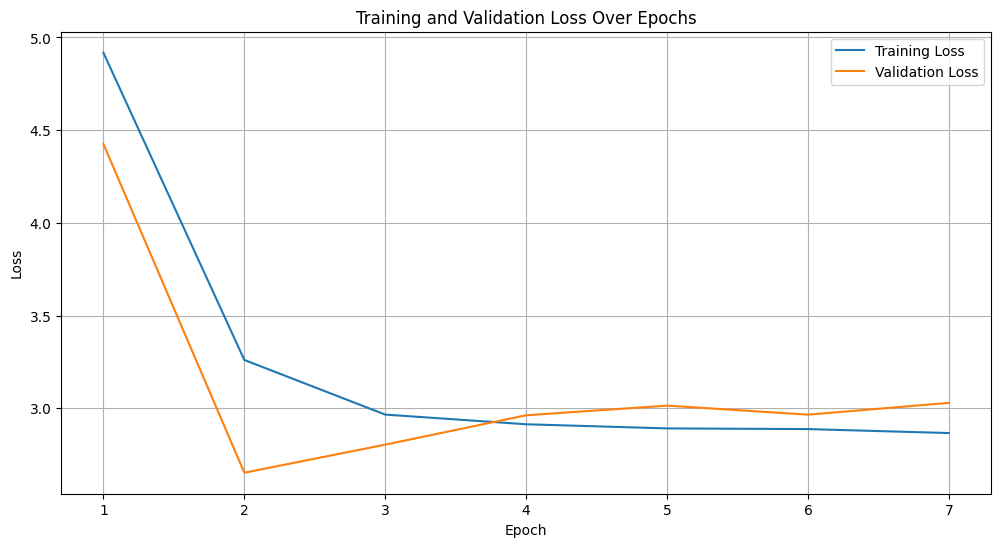

Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 2, 'gru_hidden_size': 50, 'lr': 0.01}
Epoch 1/50, Train Loss: 3.8569, Validation Loss: 2.0298
Epoch 2/50, Train Loss: 3.1232, Validation Loss: 0.9054
Epoch 3/50, Train Loss: 3.6359, Validation Loss: 2.3845
Epoch 4/50, Train Loss: 2.6386, Validation Loss: 0.6980
Epoch 5/50, Train Loss: 3.3509, Validation Loss: 1.7900
Epoch 6/50, Train Loss: 3.2827, Validation Loss: 1.3607
Epoch 7/50, Train Loss: 2.9372, Validation Loss: 0.8125
Epoch 8/50, Train Loss: 3.3473, Validation Loss: 1.6438
Epoch 9/50, Train Loss: 3.2483, Validation Loss: 1.8222
Early stopping at epoch 9


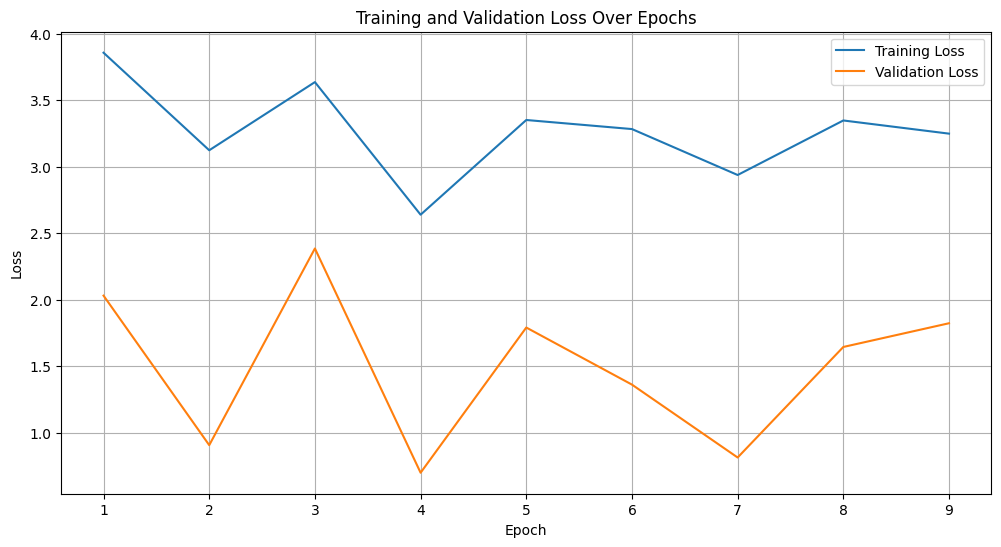

Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 2, 'gru_hidden_size': 100, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.4886, Validation Loss: 1.6015
Epoch 2/50, Train Loss: 3.4070, Validation Loss: 3.4291
Epoch 3/50, Train Loss: 3.2538, Validation Loss: 3.2741
Epoch 4/50, Train Loss: 3.1602, Validation Loss: 3.2182
Epoch 5/50, Train Loss: 3.1121, Validation Loss: 3.1605
Epoch 6/50, Train Loss: 3.0790, Validation Loss: 3.1222
Early stopping at epoch 6


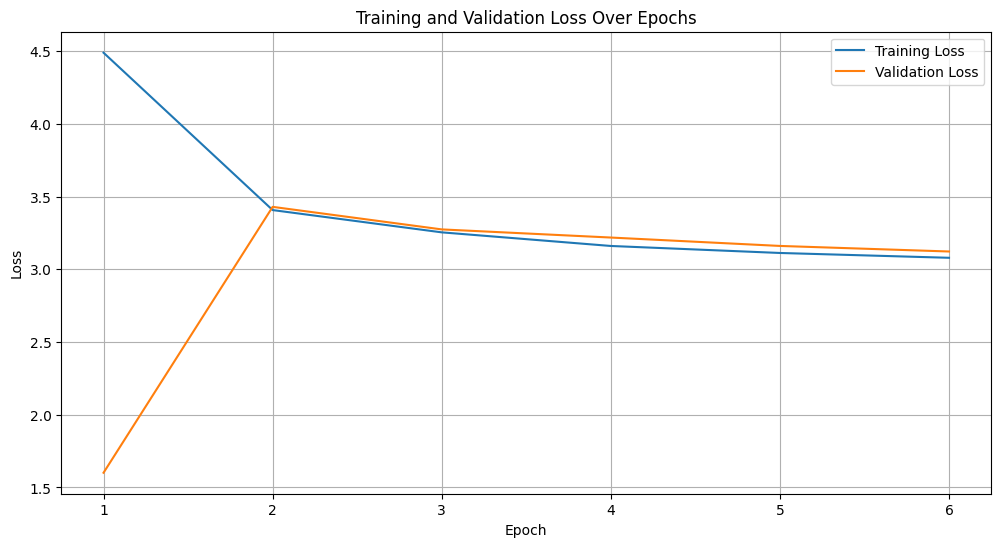

Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 2, 'gru_hidden_size': 100, 'lr': 0.01}
Epoch 1/50, Train Loss: 2.3357, Validation Loss: 0.8248
Epoch 2/50, Train Loss: 2.7784, Validation Loss: 1.1469
Epoch 3/50, Train Loss: 2.7607, Validation Loss: 0.7854
Epoch 4/50, Train Loss: 2.5789, Validation Loss: 0.8204
Epoch 5/50, Train Loss: 2.8007, Validation Loss: 0.7596
Epoch 6/50, Train Loss: 2.9259, Validation Loss: 0.5154
Epoch 7/50, Train Loss: 2.4794, Validation Loss: 0.9389
Epoch 8/50, Train Loss: 2.8569, Validation Loss: 0.6909
Epoch 9/50, Train Loss: 2.8598, Validation Loss: 0.7049
Epoch 10/50, Train Loss: 2.7281, Validation Loss: 0.8272
Epoch 11/50, Train Loss: 2.7284, Validation Loss: 0.7783
Early stopping at epoch 11


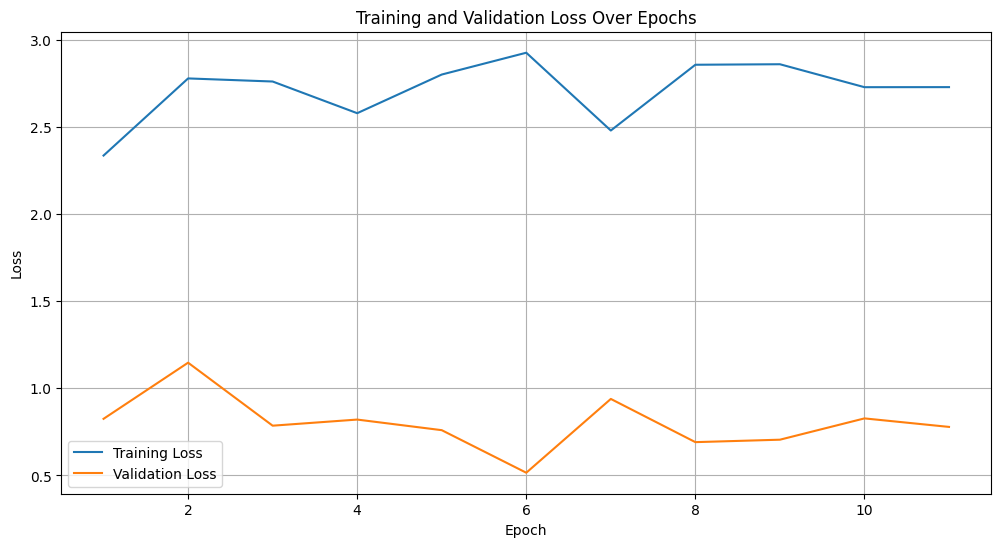

Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 4, 'gru_hidden_size': 50, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.5996, Validation Loss: 4.0207
Epoch 2/50, Train Loss: 3.1407, Validation Loss: 2.2929
Epoch 3/50, Train Loss: 2.9395, Validation Loss: 2.6875
Epoch 4/50, Train Loss: 2.8974, Validation Loss: 2.9494
Epoch 5/50, Train Loss: 2.8682, Validation Loss: 3.0453
Epoch 6/50, Train Loss: 2.8579, Validation Loss: 3.0500
Epoch 7/50, Train Loss: 2.8506, Validation Loss: 3.0546
Early stopping at epoch 7


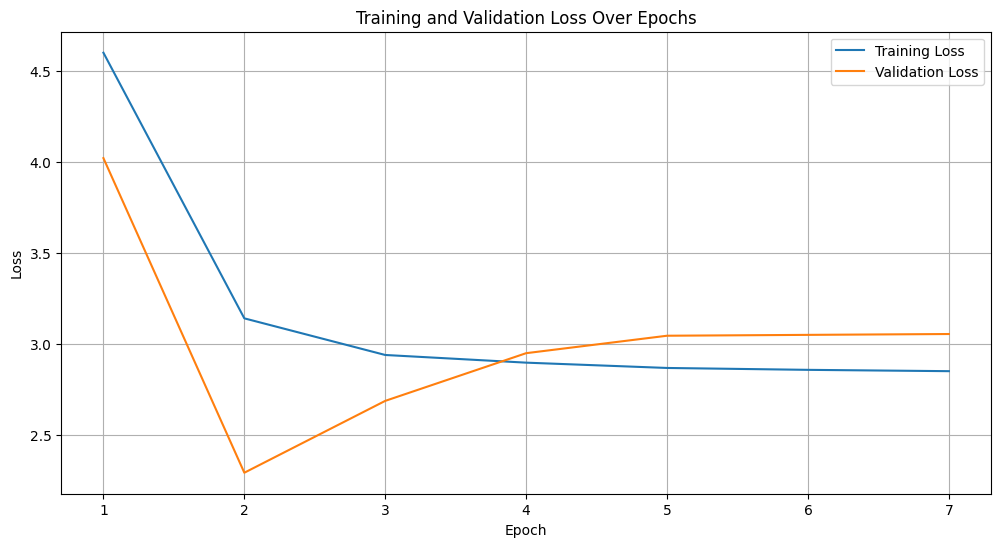

Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 4, 'gru_hidden_size': 50, 'lr': 0.01}
Epoch 1/50, Train Loss: 3.1476, Validation Loss: 0.5514
Epoch 2/50, Train Loss: 3.2760, Validation Loss: 0.9998
Epoch 3/50, Train Loss: 3.0128, Validation Loss: 0.8138
Epoch 4/50, Train Loss: 3.2300, Validation Loss: 1.2788
Epoch 5/50, Train Loss: 2.6612, Validation Loss: 0.6266
Epoch 6/50, Train Loss: 3.5962, Validation Loss: 1.8684
Early stopping at epoch 6


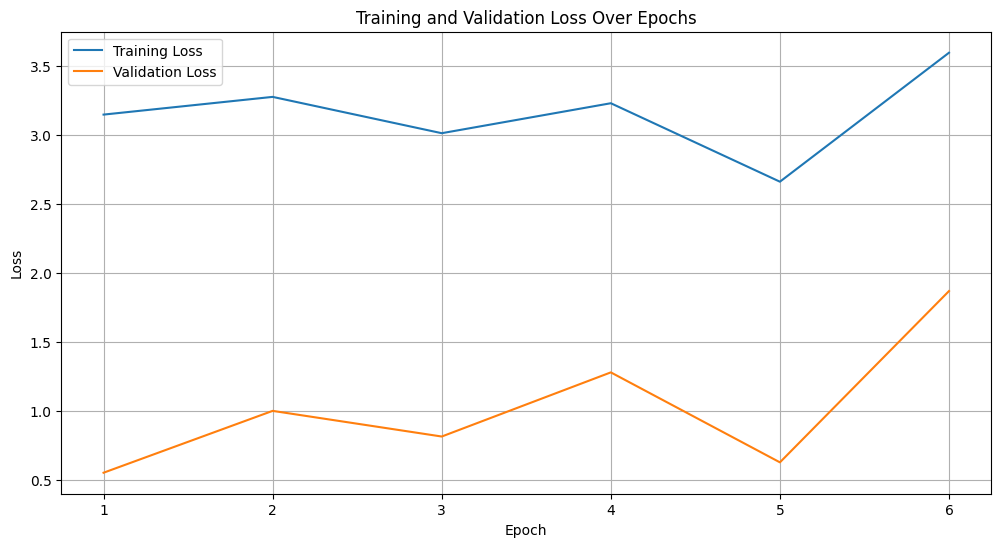

Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 4, 'gru_hidden_size': 100, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.5801, Validation Loss: 3.9068
Epoch 2/50, Train Loss: 3.4814, Validation Loss: 2.4729
Epoch 3/50, Train Loss: 3.1439, Validation Loss: 3.1090
Epoch 4/50, Train Loss: 3.1065, Validation Loss: 3.1722
Epoch 5/50, Train Loss: 3.0932, Validation Loss: 3.1470
Epoch 6/50, Train Loss: 3.0762, Validation Loss: 3.1606
Epoch 7/50, Train Loss: 3.0697, Validation Loss: 3.1524
Early stopping at epoch 7


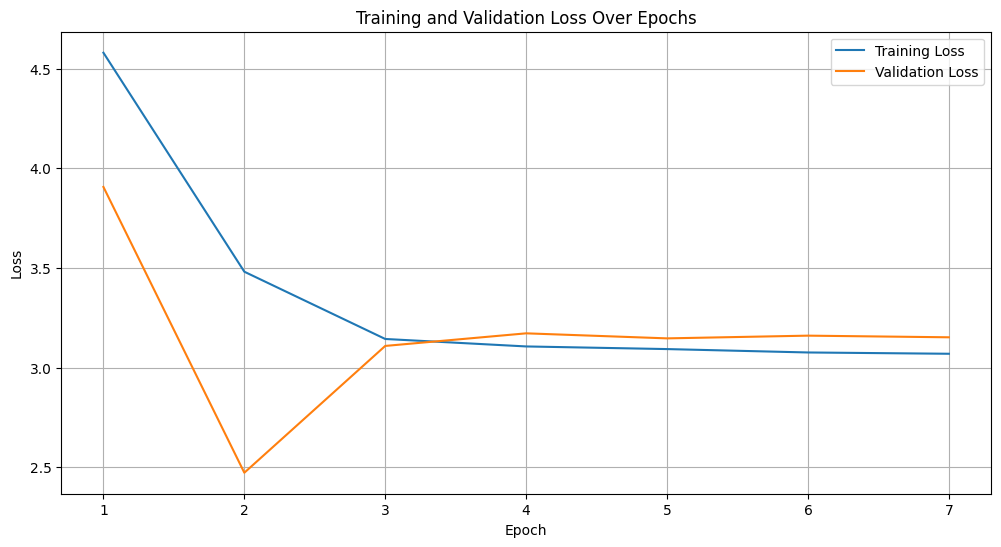

Tuning parameters: {'cnn_kernel_size': 2, 'cnn_out_channels': 4, 'gru_hidden_size': 100, 'lr': 0.01}
Epoch 1/50, Train Loss: 2.4801, Validation Loss: 1.5193
Epoch 2/50, Train Loss: 2.6815, Validation Loss: 0.6343
Epoch 3/50, Train Loss: 2.9264, Validation Loss: 0.6266
Epoch 4/50, Train Loss: 2.8036, Validation Loss: 0.7635
Epoch 5/50, Train Loss: 2.8515, Validation Loss: 0.8263
Epoch 6/50, Train Loss: 2.7211, Validation Loss: 0.7604
Epoch 7/50, Train Loss: 2.8398, Validation Loss: 0.8665
Epoch 8/50, Train Loss: 2.7015, Validation Loss: 0.7866
Early stopping at epoch 8


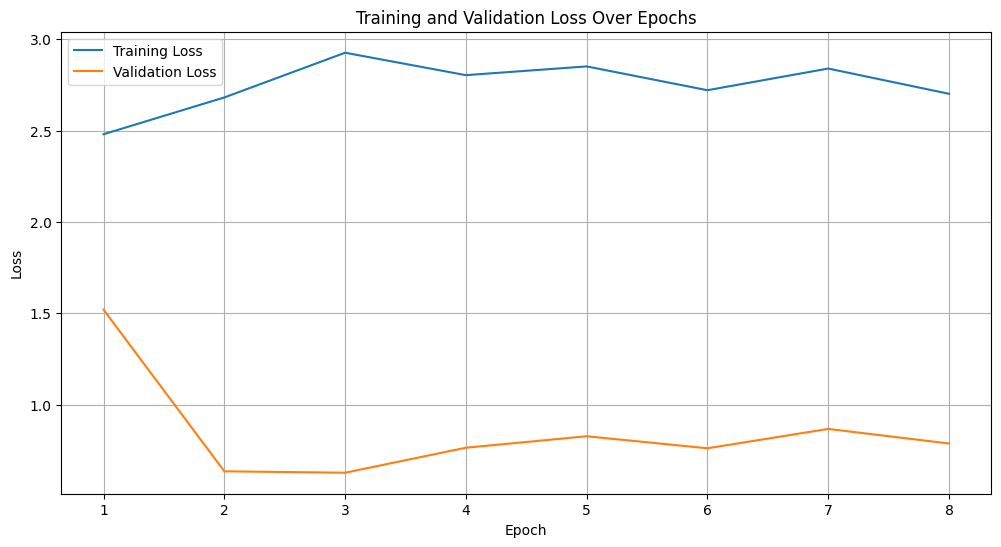

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 2, 'gru_hidden_size': 50, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.7277, Validation Loss: 4.1295
Epoch 2/50, Train Loss: 3.2761, Validation Loss: 2.2780
Epoch 3/50, Train Loss: 2.9915, Validation Loss: 2.5290
Epoch 4/50, Train Loss: 2.9335, Validation Loss: 2.7757
Epoch 5/50, Train Loss: 2.8959, Validation Loss: 2.9653
Epoch 6/50, Train Loss: 2.8807, Validation Loss: 3.0157
Epoch 7/50, Train Loss: 2.8792, Validation Loss: 2.9707
Early stopping at epoch 7


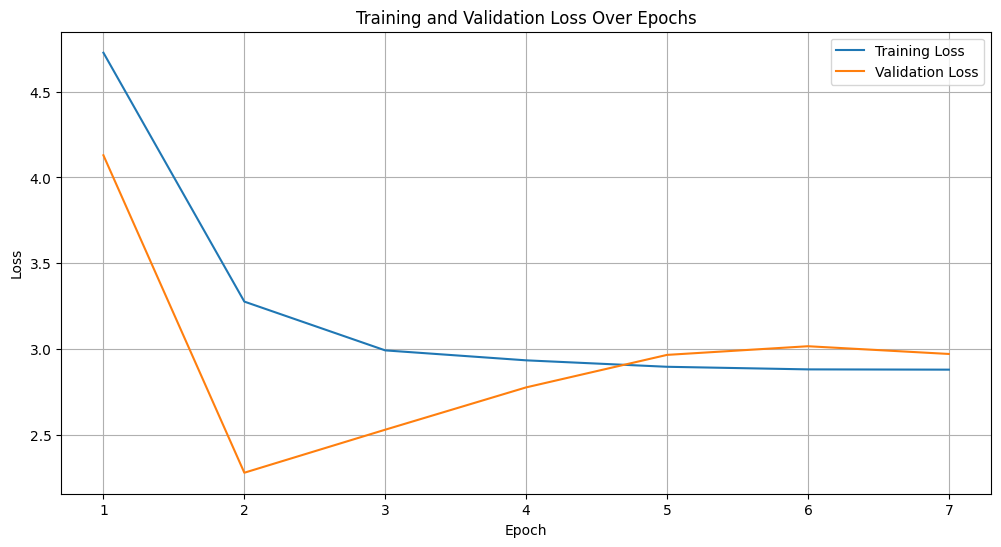

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 2, 'gru_hidden_size': 50, 'lr': 0.01}
Epoch 1/50, Train Loss: 3.7632, Validation Loss: 1.1104
Epoch 2/50, Train Loss: 2.6528, Validation Loss: 0.5899
Epoch 3/50, Train Loss: 3.6650, Validation Loss: 2.3983
Epoch 4/50, Train Loss: 2.6161, Validation Loss: 0.7456
Epoch 5/50, Train Loss: 3.2910, Validation Loss: 1.7931
Epoch 6/50, Train Loss: 3.5061, Validation Loss: 1.9362
Epoch 7/50, Train Loss: 3.5113, Validation Loss: 2.2048
Early stopping at epoch 7


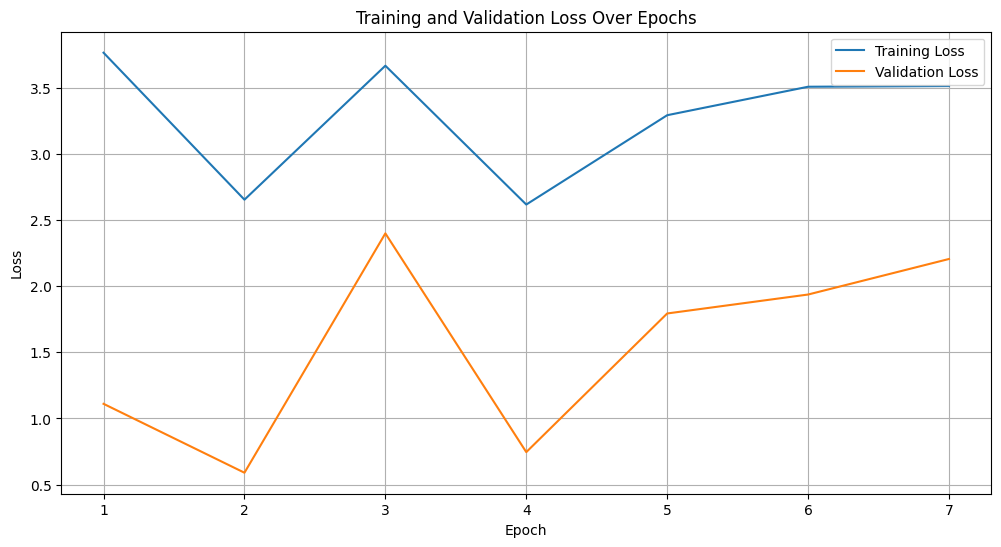

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 2, 'gru_hidden_size': 100, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.7945, Validation Loss: 2.8434
Epoch 2/50, Train Loss: 3.5885, Validation Loss: 3.5278
Epoch 3/50, Train Loss: 3.4787, Validation Loss: 3.0449
Epoch 4/50, Train Loss: 3.2953, Validation Loss: 3.0824
Epoch 5/50, Train Loss: 3.2433, Validation Loss: 2.9308
Epoch 6/50, Train Loss: 3.1781, Validation Loss: 2.9120
Early stopping at epoch 6


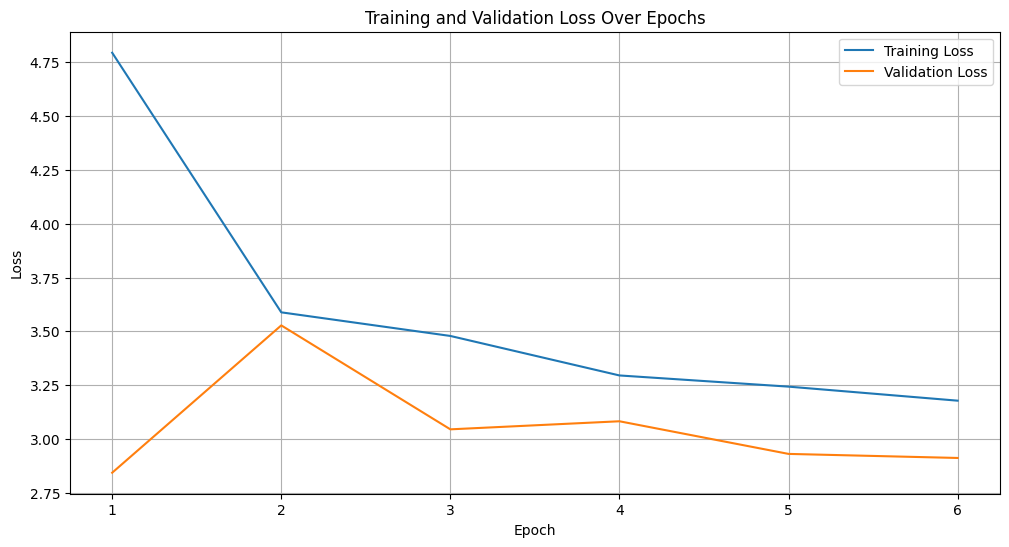

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 2, 'gru_hidden_size': 100, 'lr': 0.01}
Epoch 1/50, Train Loss: 2.2622, Validation Loss: 1.4439
Epoch 2/50, Train Loss: 2.7171, Validation Loss: 0.7092
Epoch 3/50, Train Loss: 2.6093, Validation Loss: 0.7959
Epoch 4/50, Train Loss: 2.7735, Validation Loss: 0.5104
Epoch 5/50, Train Loss: 2.5993, Validation Loss: 1.0526
Epoch 6/50, Train Loss: 2.5729, Validation Loss: 0.8032
Epoch 7/50, Train Loss: 2.7389, Validation Loss: 0.7500
Epoch 8/50, Train Loss: 2.8323, Validation Loss: 0.5266
Epoch 9/50, Train Loss: 2.5830, Validation Loss: 0.9273
Early stopping at epoch 9


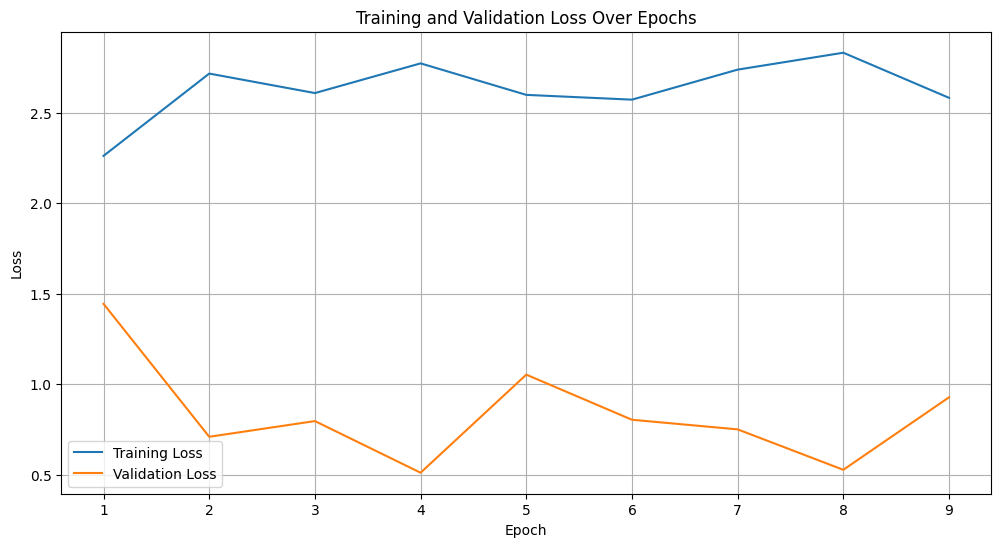

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 4, 'gru_hidden_size': 50, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.8500, Validation Loss: 4.2283
Epoch 2/50, Train Loss: 3.1517, Validation Loss: 2.5115
Epoch 3/50, Train Loss: 2.9248, Validation Loss: 2.7564
Epoch 4/50, Train Loss: 2.8859, Validation Loss: 2.9412
Epoch 5/50, Train Loss: 2.8644, Validation Loss: 3.0580
Epoch 6/50, Train Loss: 2.8497, Validation Loss: 3.1058
Epoch 7/50, Train Loss: 2.8419, Validation Loss: 3.1220
Early stopping at epoch 7


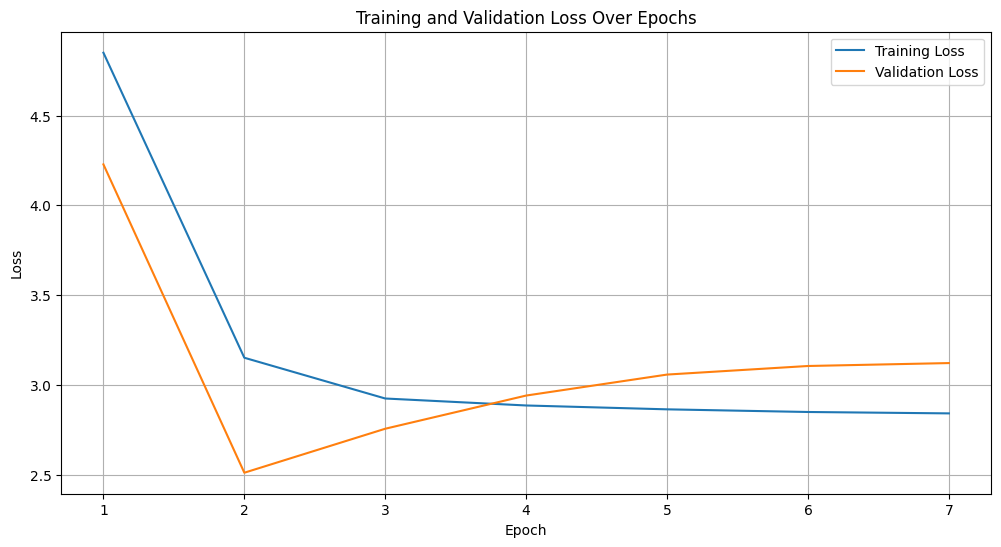

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 4, 'gru_hidden_size': 50, 'lr': 0.01}
Epoch 1/50, Train Loss: 3.5464, Validation Loss: 1.3439
Epoch 2/50, Train Loss: 3.1885, Validation Loss: 1.6743
Epoch 3/50, Train Loss: 3.4282, Validation Loss: 1.7906
Epoch 4/50, Train Loss: 3.4266, Validation Loss: 2.0548
Epoch 5/50, Train Loss: 3.3983, Validation Loss: 1.8244
Epoch 6/50, Train Loss: 3.5891, Validation Loss: 2.2066
Early stopping at epoch 6


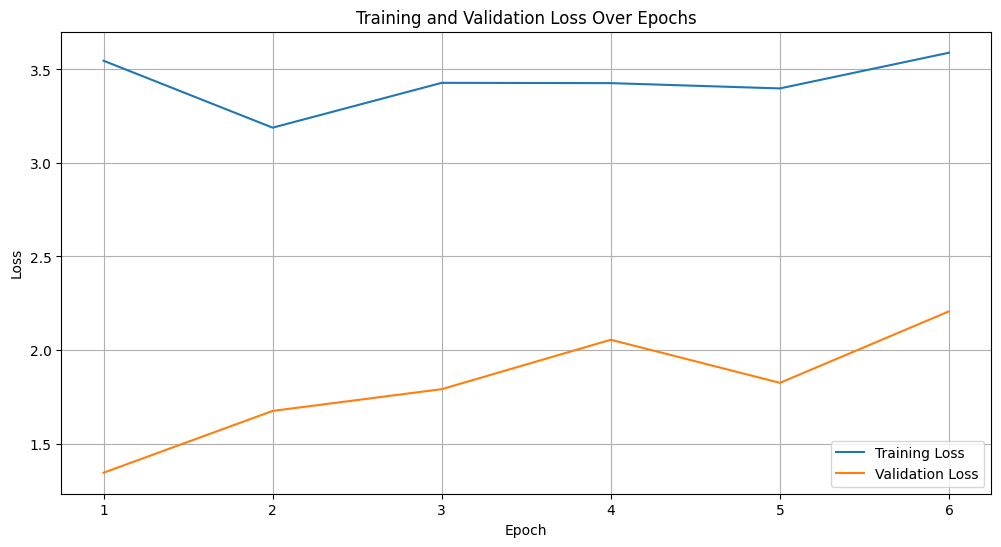

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 4, 'gru_hidden_size': 100, 'lr': 0.001}
Epoch 1/50, Train Loss: 4.5479, Validation Loss: 3.5359
Epoch 2/50, Train Loss: 3.4719, Validation Loss: 2.6185
Epoch 3/50, Train Loss: 3.1998, Validation Loss: 3.0263
Epoch 4/50, Train Loss: 3.1294, Validation Loss: 3.1347
Epoch 5/50, Train Loss: 3.0832, Validation Loss: 3.1803
Epoch 6/50, Train Loss: 3.0698, Validation Loss: 3.1599
Epoch 7/50, Train Loss: 3.0561, Validation Loss: 3.1573
Early stopping at epoch 7


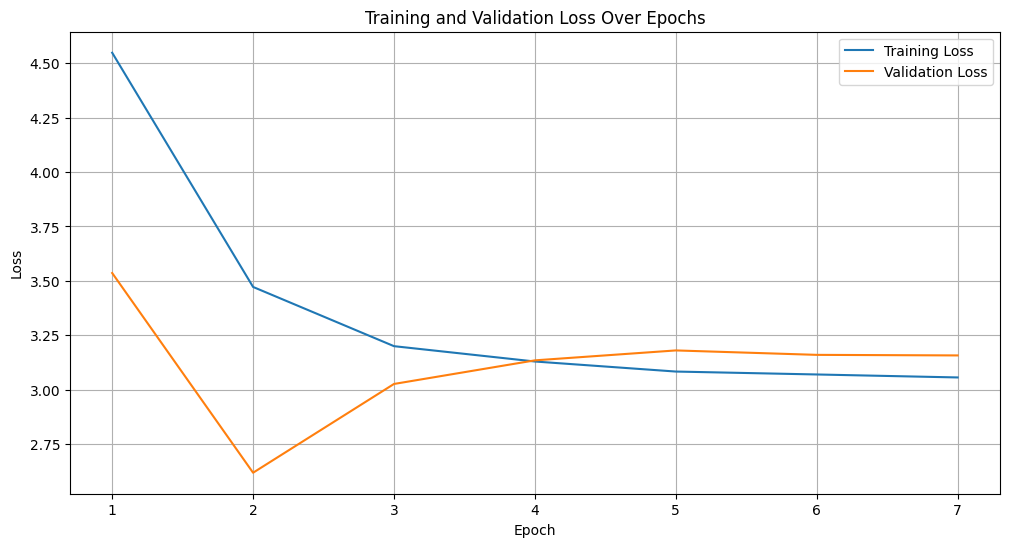

Tuning parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 4, 'gru_hidden_size': 100, 'lr': 0.01}
Epoch 1/50, Train Loss: 2.7882, Validation Loss: 1.0903
Epoch 2/50, Train Loss: 2.4597, Validation Loss: 1.1122
Epoch 3/50, Train Loss: 2.5618, Validation Loss: 1.1122
Epoch 4/50, Train Loss: 2.6533, Validation Loss: 0.9403
Epoch 5/50, Train Loss: 2.7454, Validation Loss: 0.9622
Epoch 6/50, Train Loss: 2.6150, Validation Loss: 1.0671
Epoch 7/50, Train Loss: 2.3288, Validation Loss: 1.8696
Epoch 8/50, Train Loss: 2.8530, Validation Loss: 0.6718
Epoch 9/50, Train Loss: 2.9516, Validation Loss: 0.4956
Epoch 10/50, Train Loss: 2.4814, Validation Loss: 0.9327
Epoch 11/50, Train Loss: 2.6938, Validation Loss: 0.6753
Epoch 12/50, Train Loss: 2.7368, Validation Loss: 0.8116
Epoch 13/50, Train Loss: 2.9072, Validation Loss: 0.5986
Epoch 14/50, Train Loss: 2.7956, Validation Loss: 0.7554
Early stopping at epoch 14


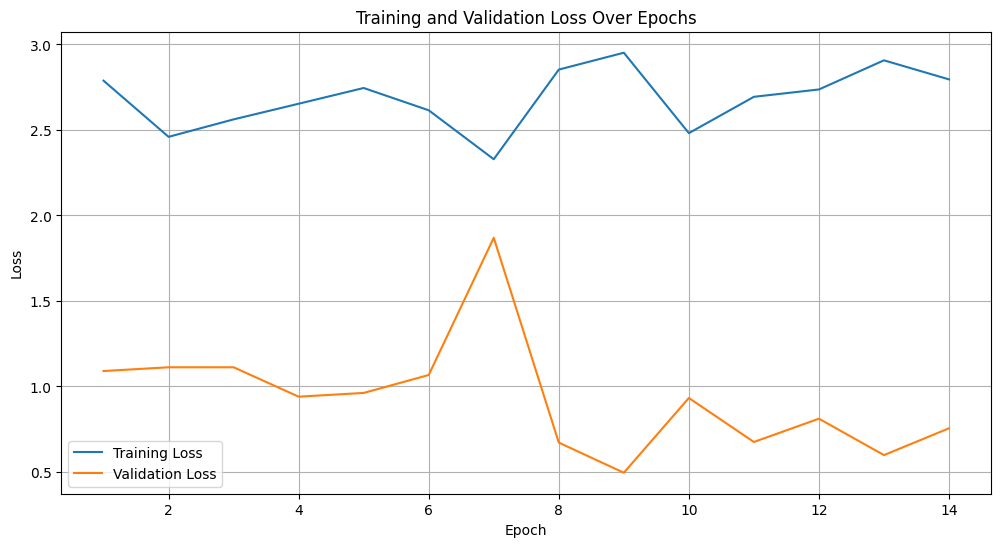

Best Parameters: {'cnn_kernel_size': 3, 'cnn_out_channels': 4, 'gru_hidden_size': 100, 'lr': 0.01}
Epoch 1/50, Train Loss: 2.4417, Validation Loss: 0.6984
Epoch 2/50, Train Loss: 2.6587, Validation Loss: 1.5395
Epoch 3/50, Train Loss: 2.4664, Validation Loss: 1.7090
Epoch 4/50, Train Loss: 2.4161, Validation Loss: 1.0149
Epoch 5/50, Train Loss: 2.7860, Validation Loss: 0.7727
Epoch 6/50, Train Loss: 2.6330, Validation Loss: 0.9604
Early stopping at epoch 6


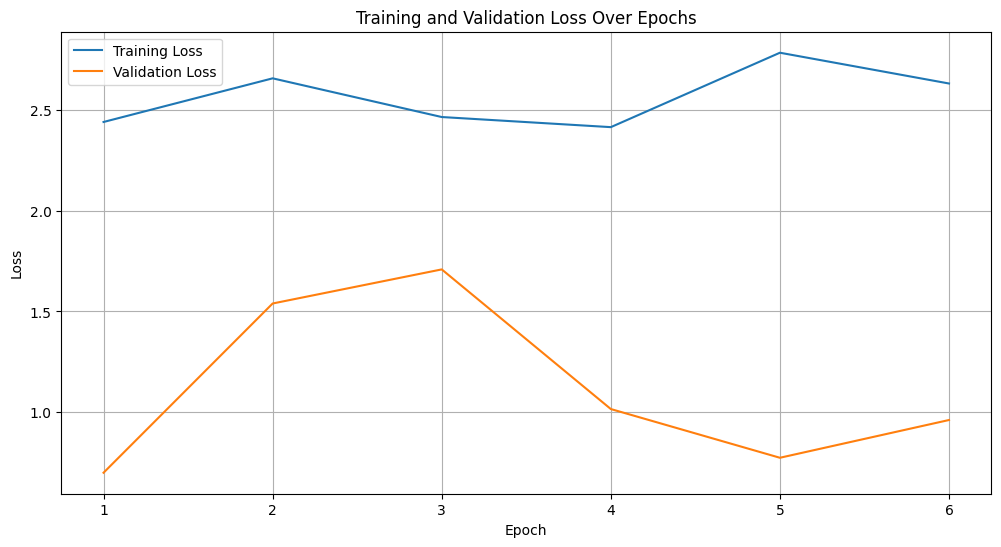

Mean Absolute Error: 19460.6875
Root Mean Squared Error: 20002.1719
R2 Score: -17.7166


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import ParameterGrid

# Preprocessing and aggregation functions
def preprocess(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]
    df_power = df_power.dropna(axis=1, how='all')
    df_hourly = df_power.resample('H').sum()
    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()
    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    building_data_combined = building_data_combined.reindex(complete_date_range)
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month
    return building_data_combined_scaled, scaler

def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

class CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size):
        super(CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size, hidden_size=gru_hidden_size, batch_first=True)
        self.fc = nn.Linear(gru_hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

def train_model(model, train_loader, val_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []
    val_losses = []

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def evaluate_model(model, test_loader, scaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'R2 Score: {r2:.4f}')

def hyperparameter_search(train_loader, val_loader, epochs=50, patience=5):
    param_grid = {
        'cnn_out_channels': [2, 4],
        'cnn_kernel_size': [2, 3],
        'gru_hidden_size': [50, 100],
        'lr': [0.001, 0.01]
    }

    best_params = None
    best_val_loss = float('inf')

    for params in ParameterGrid(param_grid):
        print(f'Tuning parameters: {params}')
        model = CNN_GRU(input_dim=train_loader.dataset.data.shape[1] - 1,
                        cnn_out_channels=params['cnn_out_channels'],
                        cnn_kernel_size=params['cnn_kernel_size'],
                        gru_hidden_size=params['gru_hidden_size'])
        train_model(model, train_loader, val_loader, epochs=epochs, lr=params['lr'], patience=patience)
        val_loss = evaluate_validation_loss(model, val_loader)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = params

    print(f'Best Parameters: {best_params}')
    return best_params

def evaluate_validation_loss(model, val_loader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.L1Loss()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss

def main():
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }

    df, scaler = aggregate_building_data(directory, file_structure)
    lagged_df = create_lagged_features(df)

    train_val_df, test_df = train_test_split(lagged_df, test_size=0.1, shuffle=False)
    train_df, val_df = train_test_split(train_val_df, test_size=0.1, shuffle=False)

    train_dataset = PowerConsumptionDataset(train_df)
    val_dataset = PowerConsumptionDataset(val_df)
    test_dataset = PowerConsumptionDataset(test_df)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    best_params = hyperparameter_search(train_loader, val_loader, epochs=50, patience=5)
    model = CNN_GRU(input_dim=train_df.shape[1] - 1,
                    cnn_out_channels=best_params['cnn_out_channels'],
                    cnn_kernel_size=best_params['cnn_kernel_size'],
                    gru_hidden_size=best_params['gru_hidden_size'])

    train_model(model, train_loader, val_loader, epochs=50, lr=best_params['lr'], patience=5)
    model.load_state_dict(torch.load('best_model.pth'))
    evaluate_model(model, test_loader, scaler)

if __name__ == '__main__':
    main()


**CNN-GRU model with paper specifications**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    df = df.interpolate(method='linear')

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features (hour and weekday only, no month)
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# CNN-GRU model
class CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size):
        super(CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size, hidden_size=gru_hidden_size, batch_first=True)
        self.fc = nn.Linear(gru_hidden_size, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x = self.dropout(x)  # Applying dropout
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }

    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
    print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
    print(building_hourly_consumption.head())

    # Create lagged features and prepare datasets
    lagged_df = create_lagged_features(building_hourly_consumption)
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    train_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    test_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Initialize and train the model
    model = CNN_GRU(input_dim=X.shape[1], cnn_out_channels=2, cnn_kernel_size=2, gru_hidden_size=100)
    train_model(model, train_loader, epochs=100, lr=0.001, patience=10)  # Adjust LR and patience

    # Evaluate the trained model
    evaluate_model(model, test_loader, scaler=scaler)

if __name__ == "__main__":
    main()


Total rows in aggregated data: 13153
                     total_building_kW  hour  weekday
2018-07-01 00:00:00          -0.811829     0        6
2018-07-01 01:00:00          -0.811829     1        6
2018-07-01 02:00:00          -0.811829     2        6
2018-07-01 03:00:00          -0.811829     3        6
2018-07-01 04:00:00          -0.811829     4        6
Epoch 1/100, Loss: 0.36072255574887796
Epoch 2/100, Loss: 0.21616794922018565
Epoch 3/100, Loss: 0.1893835943392528
Epoch 4/100, Loss: 0.1768785126266941
Epoch 5/100, Loss: 0.170404320923231
Epoch 6/100, Loss: 0.16209000629442993
Epoch 7/100, Loss: 0.1542219589314153
Epoch 8/100, Loss: 0.1479642550631236
Epoch 9/100, Loss: 0.14193586163943814
Epoch 10/100, Loss: 0.1369220382103356
Epoch 11/100, Loss: 0.13345157651491063
Epoch 12/100, Loss: 0.13319371304204386
Epoch 13/100, Loss: 0.1306511088404604
Epoch 14/100, Loss: 0.13028240115732276
Epoch 15/100, Loss: 0.12862195411036093
Epoch 16/100, Loss: 0.12794853394390435
Epoch 17/100, Lo

Total rows in aggregated data: 13153
                     total_building_kW  hour  weekday
2018-07-01 00:00:00          -0.811829     0        6
2018-07-01 01:00:00          -0.811829     1        6
2018-07-01 02:00:00          -0.811829     2        6
2018-07-01 03:00:00          -0.811829     3        6
2018-07-01 04:00:00          -0.811829     4        6
Epoch 1/100, Loss: 0.45292669967297583
Epoch 2/100, Loss: 0.2799522046760846
Epoch 3/100, Loss: 0.26723208206315197
Epoch 4/100, Loss: 0.2576965503795173
Epoch 5/100, Loss: 0.24325667025261027
Epoch 6/100, Loss: 0.23012230697498526
Epoch 7/100, Loss: 0.21252052798386542
Epoch 8/100, Loss: 0.20032811493322414
Epoch 9/100, Loss: 0.19204551702545536
Epoch 10/100, Loss: 0.1909232733230437
Epoch 11/100, Loss: 0.18454440090284552
Epoch 12/100, Loss: 0.18208130232749448
Epoch 13/100, Loss: 0.18028947791104677
Epoch 14/100, Loss: 0.17907280226548514
Epoch 15/100, Loss: 0.17537648166700076
Epoch 16/100, Loss: 0.1726679612872421
Epoch 17/100

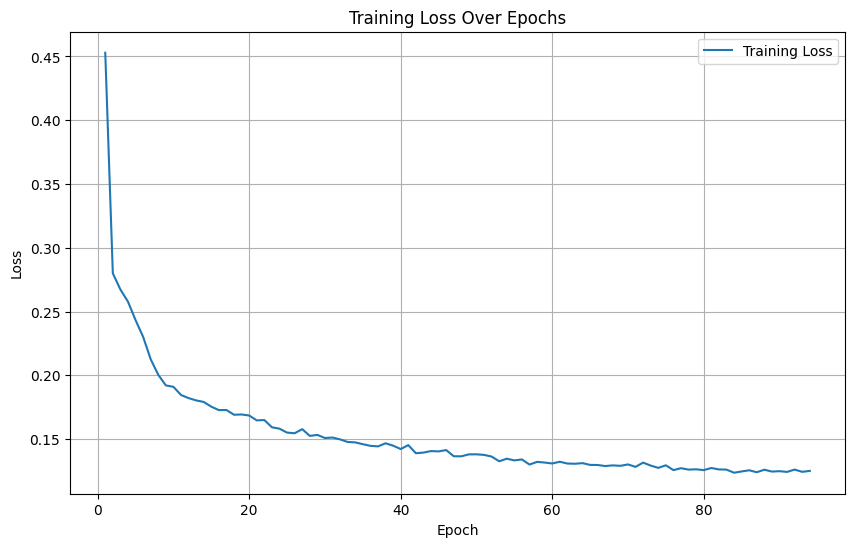

Mean Absolute Error: 1088.4842529296875
Root Mean Squared Error: 3338.333984375
R2 Score: 0.8324680552100963


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    df = df.interpolate(method='linear')

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features (hour and weekday only, no month)
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# CNN-GRU model
class CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size):
        super(CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size, hidden_size=gru_hidden_size, batch_first=True)
        self.fc = nn.Linear(gru_hidden_size, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x = self.dropout(x)  # Applying dropout
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function with learning curve plotting
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []
    val_losses = []
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plotting the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }

    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
    print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
    print(building_hourly_consumption.head())

    # Create lagged features and prepare datasets
    lagged_df = create_lagged_features(building_hourly_consumption)
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    train_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    test_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Initialize and train the model
    model = CNN_GRU(input_dim=X.shape[1], cnn_out_channels=2, cnn_kernel_size=2, gru_hidden_size=100)
    train_model(model, train_loader, epochs=100, lr=0.001, patience=10)  # Adjust LR and patience

    # Evaluate the trained model
    evaluate_model(model, test_loader, scaler=scaler)

if __name__ == "__main__":
    main()


Total rows in aggregated data: 13153
                     total_building_kW  hour  weekday  month
2018-07-01 00:00:00          -0.816607     0        6      7
2018-07-01 01:00:00          -0.816607     1        6      7
2018-07-01 02:00:00          -0.816607     2        6      7
2018-07-01 03:00:00          -0.816607     3        6      7
2018-07-01 04:00:00          -0.816607     4        6      7
Epoch 1/100, Loss: 0.26577357130665935
Epoch 2/100, Loss: 0.17977307392384417
Epoch 3/100, Loss: 0.16477045288649939
Epoch 4/100, Loss: 0.1514150203876598
Epoch 5/100, Loss: 0.1383529448861717
Epoch 6/100, Loss: 0.13249651006152552
Epoch 7/100, Loss: 0.12941365536823068
Epoch 8/100, Loss: 0.12495441502460869
Epoch 9/100, Loss: 0.12490674460767417
Epoch 10/100, Loss: 0.1238691997864554
Epoch 11/100, Loss: 0.12413355207411192
Epoch 12/100, Loss: 0.12027435689683884
Epoch 13/100, Loss: 0.1205394876099402
Epoch 14/100, Loss: 0.11783206755275367
Epoch 15/100, Loss: 0.11513456285640758
Epoch 16/1

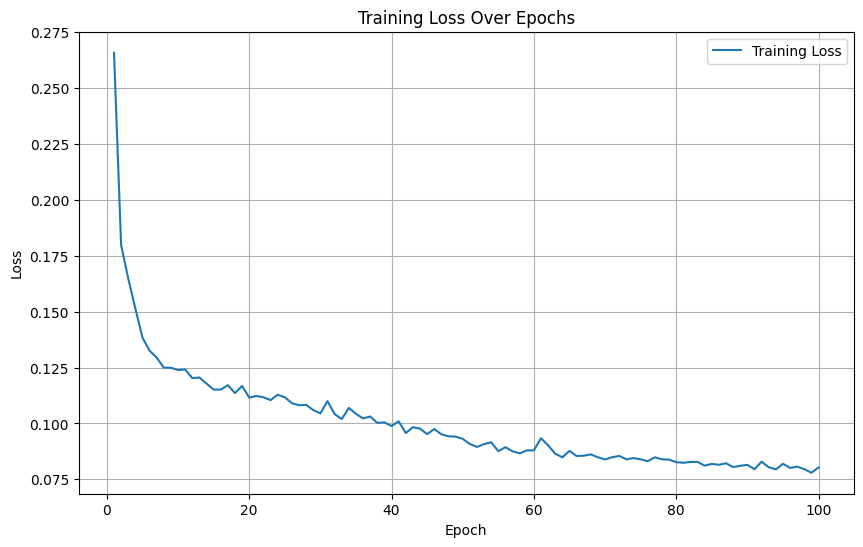

Mean Absolute Error: 816.8184814453125
Root Mean Squared Error: 2370.186279296875
R2 Score: 0.9155890397530189


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# CNN-GRU model with increased GRU hidden size
class CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size):
        super(CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size, hidden_size=gru_hidden_size, batch_first=True)
        self.fc = nn.Linear(gru_hidden_size, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x = self.dropout(x)  # Applying dropout
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function with learning curve
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []  # List to store training losses

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)  # Store the average loss for this epoch
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }

    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
    print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")
    print(building_hourly_consumption.head())

    # Create lagged features and prepare datasets
    lagged_df = create_lagged_features(building_hourly_consumption)
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    train_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    test_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Define model with increased GRU hidden size
    cnn_out_channels = 8
    cnn_kernel_size = 5
    gru_hidden_size = 512  # Increase GRU hidden size

    model = CNN_GRU(input_dim=X.shape[1], cnn_out_channels=cnn_out_channels, cnn_kernel_size=cnn_kernel_size, gru_hidden_size=gru_hidden_size)

    # Train model and plot learning curve
    train_model(model, train_loader, epochs=100, lr=0.001, patience=10)

    # Evaluate model
    evaluate_model(model, test_loader, scaler=scaler)

if __name__ == "__main__":
    main()


**CNN-LSTM multivariate model.**

Total rows in aggregated data: 13153
Epoch 1/50, Loss: 0.2862486605902752
Epoch 2/50, Loss: 0.18129624596920357
Epoch 3/50, Loss: 0.16071420854114624
Epoch 4/50, Loss: 0.15645044997154947
Epoch 5/50, Loss: 0.14504821499787182
Epoch 6/50, Loss: 0.13420891582247724
Epoch 7/50, Loss: 0.1321400339793728
Epoch 8/50, Loss: 0.12470182058322861
Epoch 9/50, Loss: 0.1226249356944877
Epoch 10/50, Loss: 0.11915361409984439
Epoch 11/50, Loss: 0.11543742504464574
Epoch 12/50, Loss: 0.11720032164131303
Epoch 13/50, Loss: 0.11623016843594701
Epoch 14/50, Loss: 0.11336041767015514
Epoch 15/50, Loss: 0.11663150922002563
Epoch 16/50, Loss: 0.11022060449762516
Epoch 17/50, Loss: 0.10751227172742407
Epoch 18/50, Loss: 0.10633990931582737
Epoch 19/50, Loss: 0.1037494108439928
Epoch 20/50, Loss: 0.10333649033164403
Epoch 21/50, Loss: 0.10363072969288711
Epoch 22/50, Loss: 0.10069915566997356
Epoch 23/50, Loss: 0.0982141260910465
Epoch 24/50, Loss: 0.09872541949152946
Epoch 25/50, Loss: 0.09947771062872496
Ep

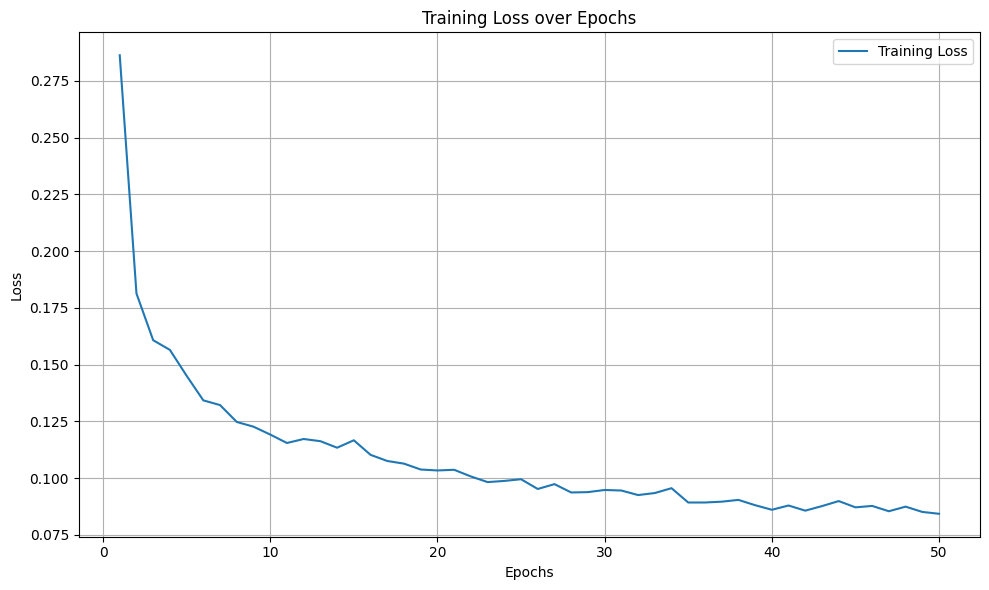

Mean Absolute Error: 918.46044921875
Root Mean Squared Error: 2558.17626953125
R2 Score: 0.9142298568489498


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.lstm1 = nn.LSTM(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=lstm_hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=lstm_hidden_size, hidden_size=lstm_hidden_size, batch_first=True)
        self.fc = nn.Linear(lstm_hidden_size, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.lstm1(x)
        x = self.dropout(x)  # Applying dropout
        x, _ = self.lstm2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function with learning curve
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []  # To store training losses

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)  # Store the average loss for this epoch
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }

    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)
    print(f"Total rows in aggregated data: {len(building_hourly_consumption)}")

    # Create lagged features and include temporal features
    lagged_df = create_lagged_features(building_hourly_consumption)

    # Train-test split
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Create DataLoader
    train_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

    # Initialize model
    model = CNN_LSTM(input_dim=X.shape[1], cnn_out_channels=2, cnn_kernel_size=2, lstm_hidden_size=100)

    # Train model
    train_model(model, train_loader, epochs=50, lr=0.01, patience=10)

    # Evaluation
    test_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    model.load_state_dict(torch.load('best_model.pth'))
    evaluate_model(model, test_loader, scaler)

if __name__ == "__main__":
    main()


Epoch 1/80, Loss: 3.0245230628783446
Epoch 2/80, Loss: 2.640279646379402
Epoch 3/80, Loss: 2.6250314712524414
Epoch 4/80, Loss: 2.6271161659654365
Epoch 5/80, Loss: 2.6297329391341613
Epoch 6/80, Loss: 2.6440755516649728
Epoch 7/80, Loss: 2.630014732659581
Epoch 8/80, Loss: 2.6279683314174056
Epoch 9/80, Loss: 2.6284748531249633
Epoch 10/80, Loss: 2.6223621253507683
Epoch 11/80, Loss: 2.616933785289167
Epoch 12/80, Loss: 2.6192284865551683
Epoch 13/80, Loss: 2.6196794509887695
Epoch 14/80, Loss: 2.624652423054339
Epoch 15/80, Loss: 2.6249103919569268
Epoch 16/80, Loss: 2.6221240083855317
Epoch 17/80, Loss: 2.638265032366098
Epoch 18/80, Loss: 2.622897090682064
Epoch 19/80, Loss: 2.6291319950517402
Epoch 20/80, Loss: 2.625474329454353
Epoch 21/80, Loss: 2.6194627830781134
Early stopping at epoch 21


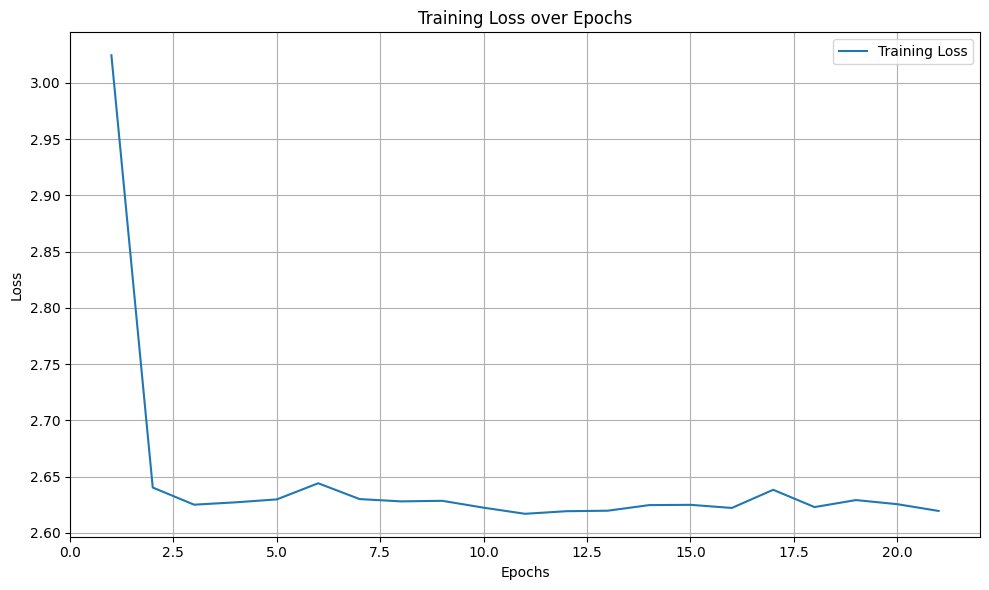

Mean Absolute Error: 33765.75
Root Mean Squared Error: 35158.4609375
R2 Score: -11.876276279090975


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.lstm1 = nn.LSTM(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=lstm_hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=lstm_hidden_size, hidden_size=lstm_hidden_size, batch_first=True)
        self.fc = nn.Linear(lstm_hidden_size, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.lstm1(x)
        x = torch.relu(x)  # Applying ReLU activation after lstm1
        x = self.dropout(x)  # Applying dropout
        x, _ = self.lstm2(x)
        x = torch.relu(x)  # Applying ReLU activation after lstm2
        x = self.fc(x[:, -1, :])
        return x

# Training function with learning curve
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []  # To store training losses

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)  # Store the average loss for this epoch
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv']
    }

    building_data, scaler = aggregate_building_data(directory, file_structure)
    lagged_data = create_lagged_features(building_data)

    # Split data into train and test sets
    train_data, test_data = train_test_split(lagged_data, test_size=0.1, shuffle=False)

    # Create Datasets and DataLoaders
    train_dataset = PowerConsumptionDataset(train_data)
    test_dataset = PowerConsumptionDataset(test_data)
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Define model parameters
    input_dim = len(train_data.columns) - 1  # Number of features
    cnn_out_channels = 2
    cnn_kernel_size = 2
    lstm_hidden_size = 100

    # Initialize and train the model
    model = CNN_LSTM(input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size)
    train_model(model, train_loader, epochs=80, lr=0.01, patience=10)

    # Evaluate the model
    evaluate_model(model, test_loader, scaler)

if __name__ == '__main__':
    main()


Epoch 1/80, Loss: 3.1781216558203638
Epoch 2/80, Loss: 2.5640645515487854
Epoch 3/80, Loss: 2.345527447849871
Epoch 4/80, Loss: 2.176751405359751
Epoch 5/80, Loss: 2.132315884153527
Epoch 6/80, Loss: 2.12656825996307
Epoch 7/80, Loss: 2.1083008338169877
Epoch 8/80, Loss: 2.1064379085977394
Epoch 9/80, Loss: 2.0891219564231047
Epoch 10/80, Loss: 2.0953040884201783
Epoch 11/80, Loss: 2.085209040756685
Epoch 12/80, Loss: 2.0726868043462914
Epoch 13/80, Loss: 2.056904848799648
Epoch 14/80, Loss: 2.046241131173559
Epoch 15/80, Loss: 2.060296394738806
Epoch 16/80, Loss: 2.0478395711944763
Epoch 17/80, Loss: 2.0288968833096055
Epoch 18/80, Loss: 2.030591097222753
Epoch 19/80, Loss: 2.008657425282949
Epoch 20/80, Loss: 2.0174500942230225
Epoch 21/80, Loss: 2.0208057193871003
Epoch 22/80, Loss: 2.0161027477448243
Epoch 23/80, Loss: 2.0280455494501504
Epoch 24/80, Loss: 2.016844598643751
Epoch 25/80, Loss: 2.0020759536559325
Epoch 26/80, Loss: 2.0016562823789665
Epoch 27/80, Loss: 2.010079451354

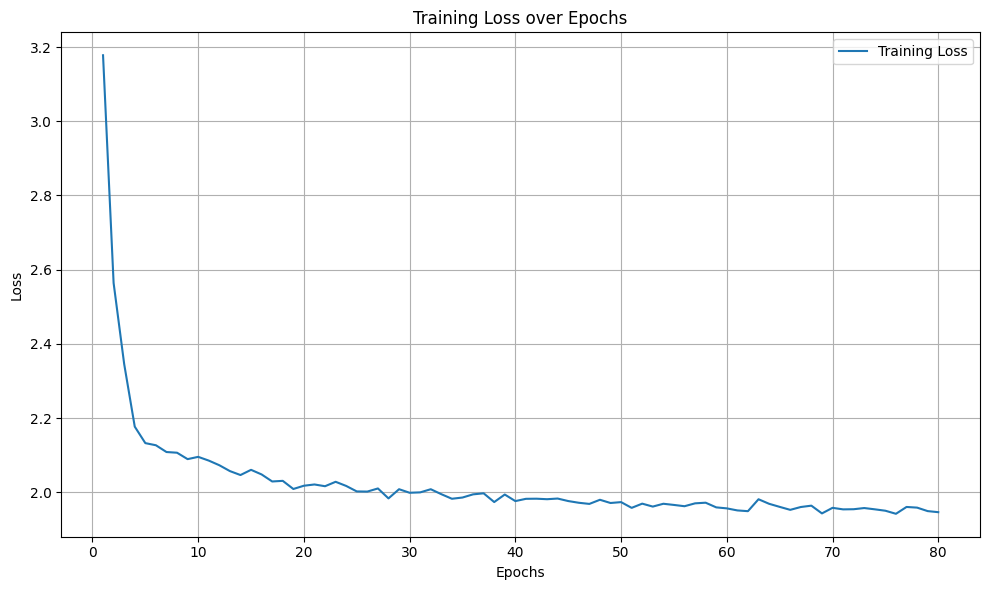

Mean Absolute Error: 43296.7265625
Root Mean Squared Error: 44577.3984375
R2 Score: -19.6995057068854


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Impute missing values using forward fill and backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.lstm = nn.LSTM(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=lstm_hidden_size, batch_first=True)
        self.fc = nn.Linear(lstm_hidden_size, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.lstm(x)
        x = torch.relu(x)  # Applying ReLU activation after LSTM layer
        x = self.dropout(x)  # Applying dropout
        x = self.fc(x[:, -1, :])
        return x

# Training function with learning curve
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []  # To store training losses

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)  # Store the average loss for this epoch
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    # Example usage of preprocessing and aggregation
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv']
    }

    building_data, scaler = aggregate_building_data(directory, file_structure)
    lagged_data = create_lagged_features(building_data)

    # Split data into train and test sets
    train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

    # Create Datasets and DataLoaders
    train_dataset = PowerConsumptionDataset(train_data)
    test_dataset = PowerConsumptionDataset(test_data)
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Define model parameters
    input_dim = len(train_data.columns) - 1  # Number of features
    cnn_out_channels = 2
    cnn_kernel_size = 2
    lstm_hidden_size = 100

    # Initialize and train the model
    model = CNN_LSTM(input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size)
    train_model(model, train_loader, epochs=80, lr=0.01, patience=10)

    # Evaluate the model
    evaluate_model(model, test_loader, scaler)

if __name__ == '__main__':
    main()


**Multivariate Bidirectional GRU.**

Epoch 1/100, Loss: 0.46956168259343795
Epoch 2/100, Loss: 0.25035242207588687
Epoch 3/100, Loss: 0.16933837332712706
Epoch 4/100, Loss: 0.150852712171693
Epoch 5/100, Loss: 0.13630946020605744
Epoch 6/100, Loss: 0.1321178919445443
Epoch 7/100, Loss: 0.13077455702968824
Epoch 8/100, Loss: 0.12298516011846963
Epoch 9/100, Loss: 0.11626734472410653
Epoch 10/100, Loss: 0.11861173840620184
Epoch 11/100, Loss: 0.11647005603518537
Epoch 12/100, Loss: 0.11592090430278931
Epoch 13/100, Loss: 0.11163261224345494
Epoch 14/100, Loss: 0.1187129243807767
Epoch 15/100, Loss: 0.10856045682423858
Epoch 16/100, Loss: 0.10916870828437548
Epoch 17/100, Loss: 0.11118216896730085
Epoch 18/100, Loss: 0.11374141916792879
Epoch 19/100, Loss: 0.10652916505932808
Epoch 20/100, Loss: 0.10723356746377484
Epoch 21/100, Loss: 0.10638893475776078
Epoch 22/100, Loss: 0.10393412435247053
Epoch 23/100, Loss: 0.1035638637440179
Epoch 24/100, Loss: 0.10218728405814018
Epoch 25/100, Loss: 0.10355945780713072
Epoch 26/100, 

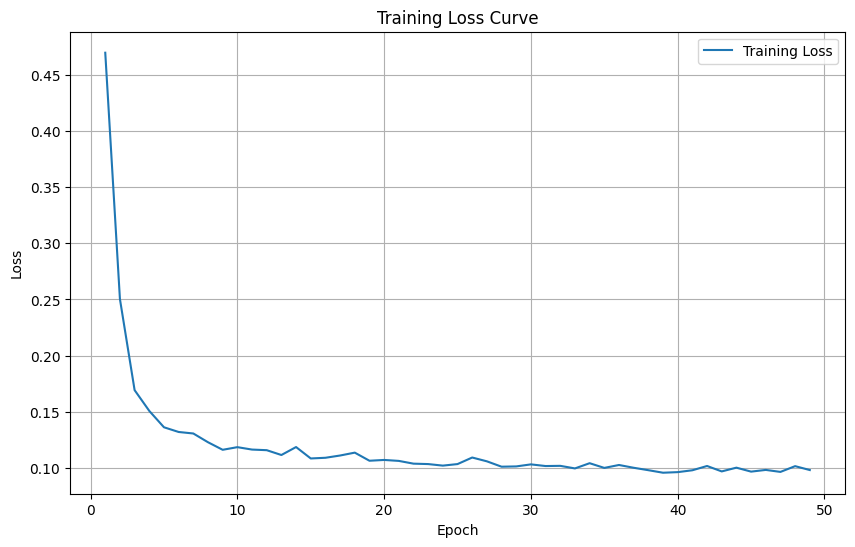

Mean Absolute Error: 1172.5404052734375
Root Mean Squared Error: 2889.132568359375
R2 Score: 0.8745204375605705


In [ ]:

def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Interpolate missing values linearly
    df = df.interpolate(method='linear')

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# Bidirectional CNN-GRU model with specified parameters
class Bidirectional_CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels=2, cnn_kernel_size=8, gru_hidden_size=512):
        super(Bidirectional_CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True, bidirectional=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size * 2, hidden_size=gru_hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(gru_hidden_size * 2, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x = self.dropout(x)  # Applying dropout
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    best_loss = float('inf')
    patience_counter = 0
    train_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }
    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)

    # Create lagged features and prepare datasets
    lagged_df = create_lagged_features(building_hourly_consumption)
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    train_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    test_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Define model with specified parameters
    model = Bidirectional_CNN_GRU(input_dim=X.shape[1])

    # Train model
    train_model(model, train_loader, epochs=100, lr=0.01, patience=10)

    # Evaluate model
    evaluate_model(model, test_loader, scaler=scaler)

if __name__ == "__main__":
    main()


3 gru layers

Epoch 1/80, Loss: 0.5533275303083012
Epoch 2/80, Loss: 0.32626300825771076
Epoch 3/80, Loss: 0.2668372386819627
Epoch 4/80, Loss: 0.22995910887797194
Epoch 5/80, Loss: 0.1962053197694112
Epoch 6/80, Loss: 0.183492761150182
Epoch 7/80, Loss: 0.1846292957618653
Epoch 8/80, Loss: 0.18000392164720827
Epoch 9/80, Loss: 0.17513500252761036
Epoch 10/80, Loss: 0.1710572207728064
Epoch 11/80, Loss: 0.17088058377694654
Epoch 12/80, Loss: 0.17113771276122117
Epoch 13/80, Loss: 0.1811241827994944
Epoch 14/80, Loss: 0.17505922233573643
Epoch 15/80, Loss: 0.17357125990541586
Epoch 16/80, Loss: 0.16888531086495123
Epoch 17/80, Loss: 0.15568291748234306
Epoch 18/80, Loss: 0.15330668651016363
Epoch 19/80, Loss: 0.16954217384378595
Epoch 20/80, Loss: 0.16582992040069708
Epoch 21/80, Loss: 0.1646911118583507
Epoch 22/80, Loss: 0.16076382871223502
Epoch 23/80, Loss: 0.15768125711614828
Epoch 24/80, Loss: 0.15522309067288795
Epoch 25/80, Loss: 0.151988490024604
Epoch 26/80, Loss: 0.15299739293664336
Epoch 

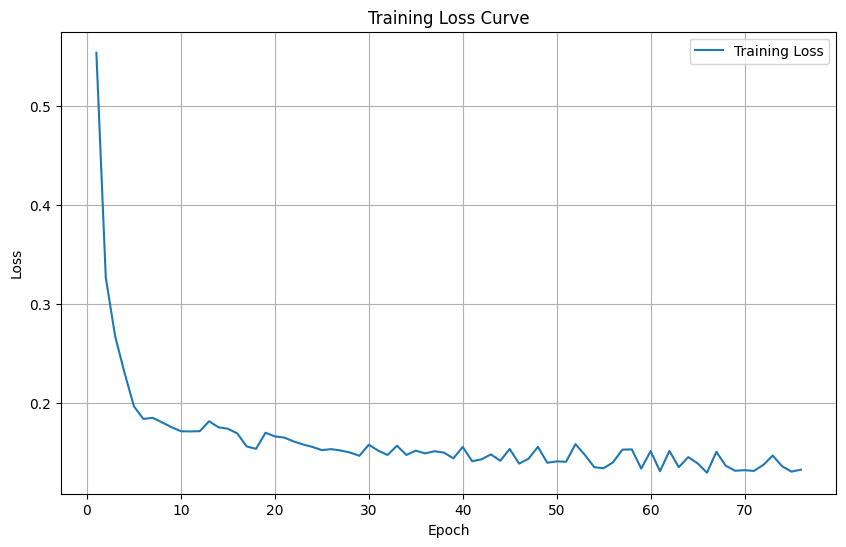

Mean Absolute Error: 1152.2747802734375
Root Mean Squared Error: 3480.8505859375
R2 Score: 0.8409143911683927


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Interpolate missing values linearly
    df = df.interpolate(method='linear')

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Create lagged features and include temporal features
def create_lagged_features(df, lag=8):
    lagged_df = pd.DataFrame(index=df.index)
    for i in range(lag):
        lagged_df[f'total_building_kW_lag_{i+1}'] = df['total_building_kW'].shift(i+1)
    lagged_df['total_building_kW'] = df['total_building_kW']
    lagged_df['hour'] = df['hour']
    lagged_df['weekday'] = df['weekday']
    lagged_df['month'] = df['month']
    lagged_df.dropna(inplace=True)
    return lagged_df

# Custom Dataset class
class PowerConsumptionDataset(Dataset):
    def __init__(self, df):
        self.data = df.values

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self, idx):
        x = self.data[idx, :-1]
        y = self.data[idx + 1, -1]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(0)

# Bidirectional CNN-GRU model with specified parameters
class Bidirectional_CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels=2, cnn_kernel_size=2, gru_hidden_size=100):
        super(Bidirectional_CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True, bidirectional=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size * 2, hidden_size=gru_hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(gru_hidden_size * 2, 1)
        self.dropout = nn.Dropout(0.2)  # Dropout layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x = self.dropout(x)  # Applying dropout
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        return x

# Training function
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    best_loss = float('inf')
    patience_counter = 0
    train_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluation function
def evaluate_model(model, test_loader, scaler=StandardScaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}')

# Main function
def main():
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }
    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)

    # Create lagged features including temporal features
    lagged_df = create_lagged_features(building_hourly_consumption)

    # Split data into train and test sets
    X = lagged_df.drop(columns=['total_building_kW']).values
    y = lagged_df['total_building_kW'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Create DataLoader
    train_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=lagged_df.columns))
    test_dataset = PowerConsumptionDataset(pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=lagged_df.columns))

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Initialize model
    input_dim = X_train.shape[1]
    model = Bidirectional_CNN_GRU(input_dim=input_dim)

    # Train model
    train_model(model, train_loader, epochs=80, lr=0.001, patience=10)

    # Evaluate model
    evaluate_model(model, test_loader, scaler=scaler)

if __name__ == '__main__':
    main()


In [ ]:

model = {
    'Model': ['CNN-GRU Hybrid Multivariate', 'CNN-GRU Univariate',
              'Linear Regression Multivariate', 'Linear Regression Univariate',
              'CNN-LSTM Univariate', 'CNN-LSTM Multivariate',
              'Bidirectional Multivariate GRU'],
    'MAE': [953.592, 872.895, 1156.76, 1204.82, 895.114, 918.460, 997.956],
    'RMSE': [2303.911, 3058.363, 3008.85, 3016.68, 3064.062, 2558.176, 2386.771],
    'R2 Score': [0.920, 0.878, 0.878, 0.880, 0.859, 0.914, 0.914]
}

# Create DataFrame
df_scores = pd.DataFrame(model)

# Display the dataframe
print("Model Scores:")
print(df_scores)


Model Scores:
                            Model       MAE      RMSE  R2 Score
0     CNN-GRU Hybrid Multivariate   953.592  2303.911     0.920
1              CNN-GRU Univariate   872.895  3058.363     0.878
2  Linear Regression Multivariate  1156.760  3008.850     0.878
3    Linear Regression Univariate  1204.820  3016.680     0.880
4             CNN-LSTM Univariate   895.114  3064.062     0.859
5           CNN-LSTM Multivariate   918.460  2558.176     0.914
6  Bidirectional Multivariate GRU   997.956  2386.771     0.914


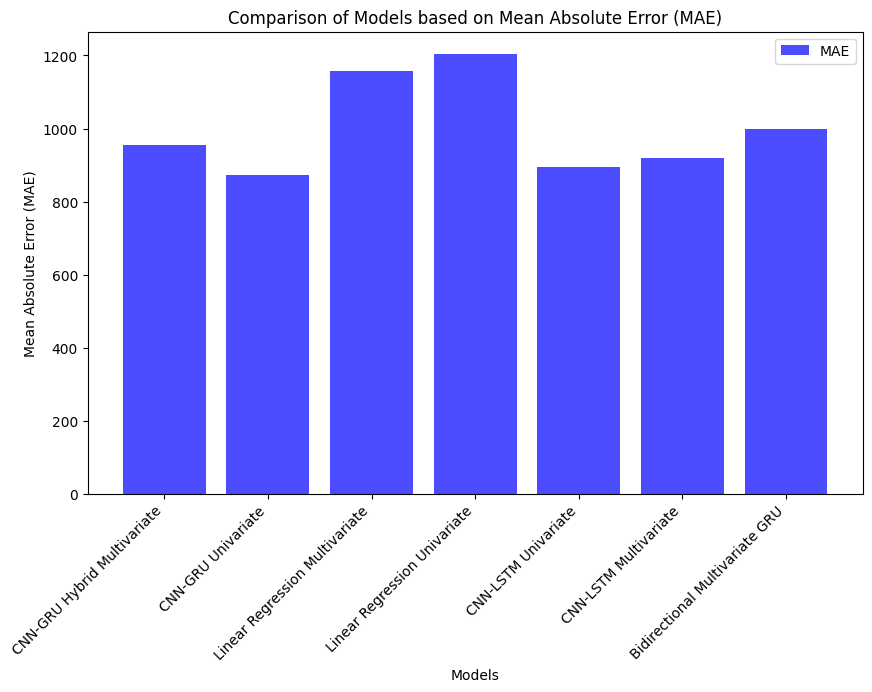

In [ ]:

# Plotting MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='blue', alpha=0.7, label='MAE')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Models based on Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()




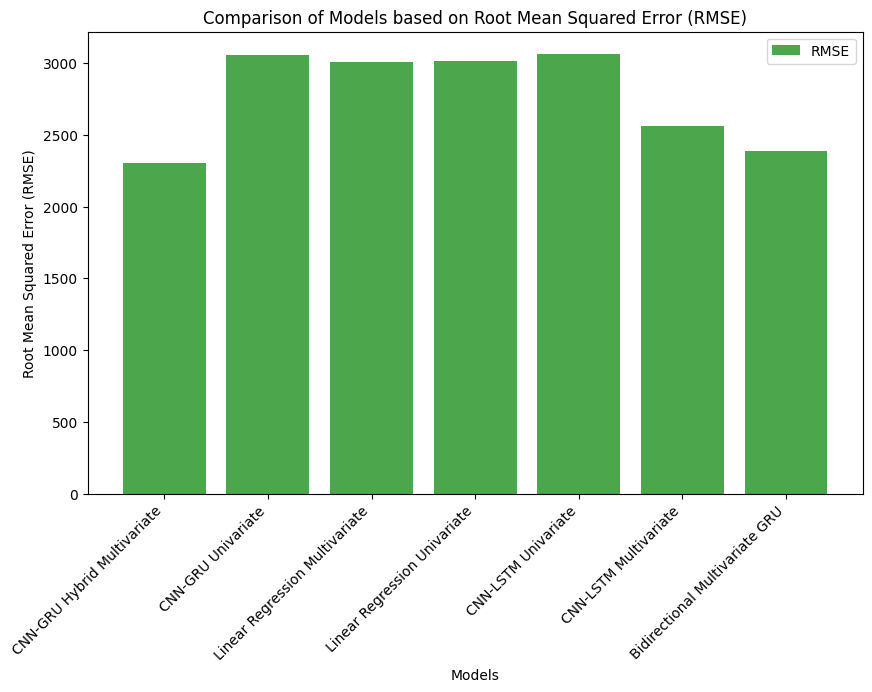

In [ ]:
# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='green', alpha=0.7, label='RMSE')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Models based on Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

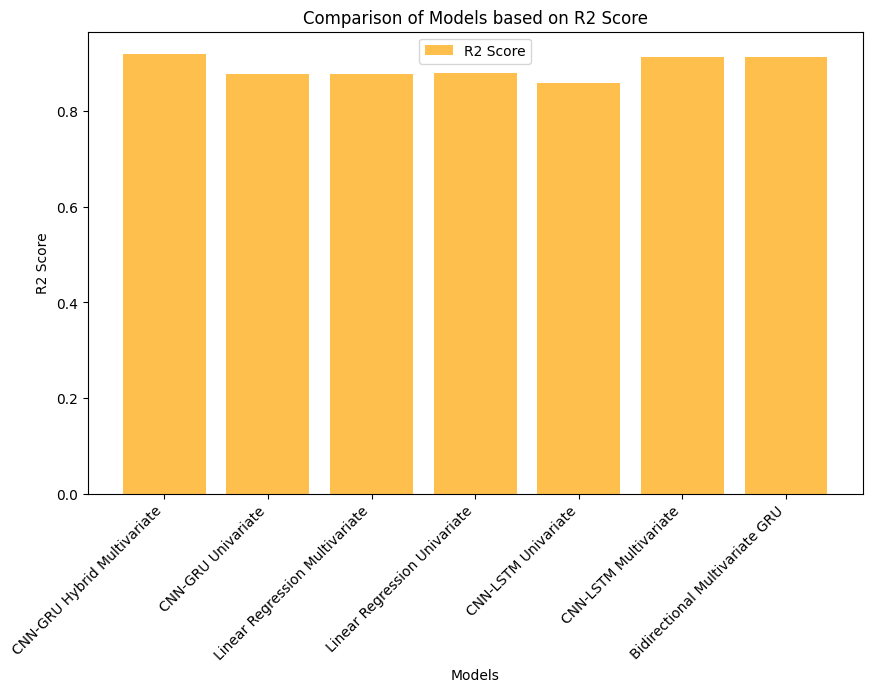

In [ ]:
# Plotting R2 Score
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='orange', alpha=0.7, label='R2 Score')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of Models based on R2 Score')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1/50, Loss: 0.7437181695398077
Epoch 2/50, Loss: 0.7404010403587158
Epoch 3/50, Loss: 0.7394724107650389
Epoch 4/50, Loss: 0.7381193443953272
Epoch 5/50, Loss: 0.7376180298357125
Epoch 6/50, Loss: 0.7401266126747591
Epoch 7/50, Loss: 0.7391017933925951
Epoch 8/50, Loss: 0.7380436874297728
Epoch 9/50, Loss: 0.7416713022323976
Epoch 10/50, Loss: 0.7381364739084818
Early stopping at epoch 10


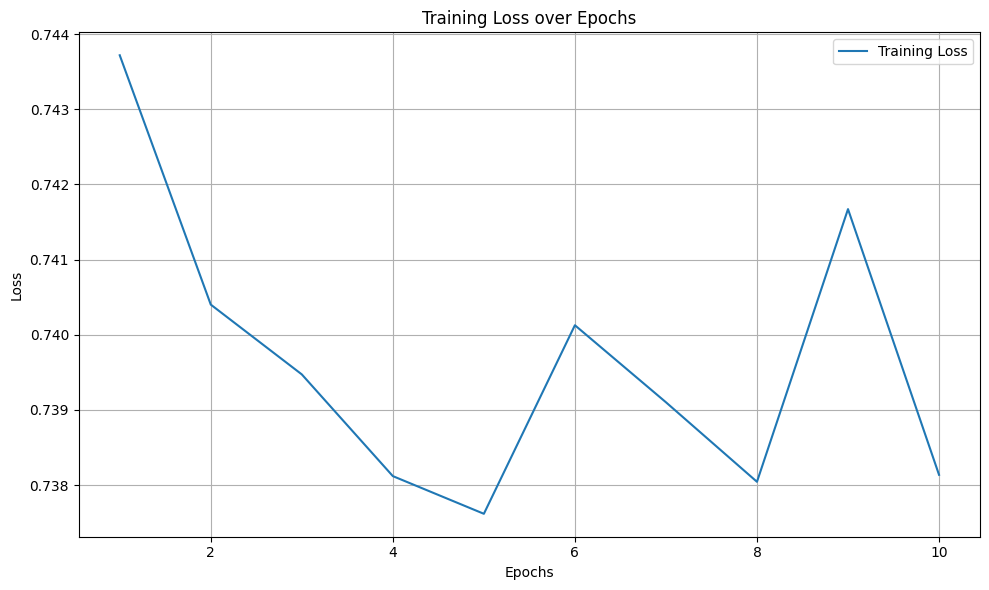

Epoch 1/50, Loss: 0.7457624020346676
Epoch 2/50, Loss: 0.739625248564295
Epoch 3/50, Loss: 0.7426398970994604
Epoch 4/50, Loss: 0.7386044084307659
Epoch 5/50, Loss: 0.7382652874452522
Epoch 6/50, Loss: 0.7403916666306645
Epoch 7/50, Loss: 0.736740477831967
Epoch 8/50, Loss: 0.7398928791643625
Epoch 9/50, Loss: 0.7402045970939728
Epoch 10/50, Loss: 0.7405071947948042
Epoch 11/50, Loss: 0.7389222950820463
Epoch 12/50, Loss: 0.7398157880966922
Early stopping at epoch 12


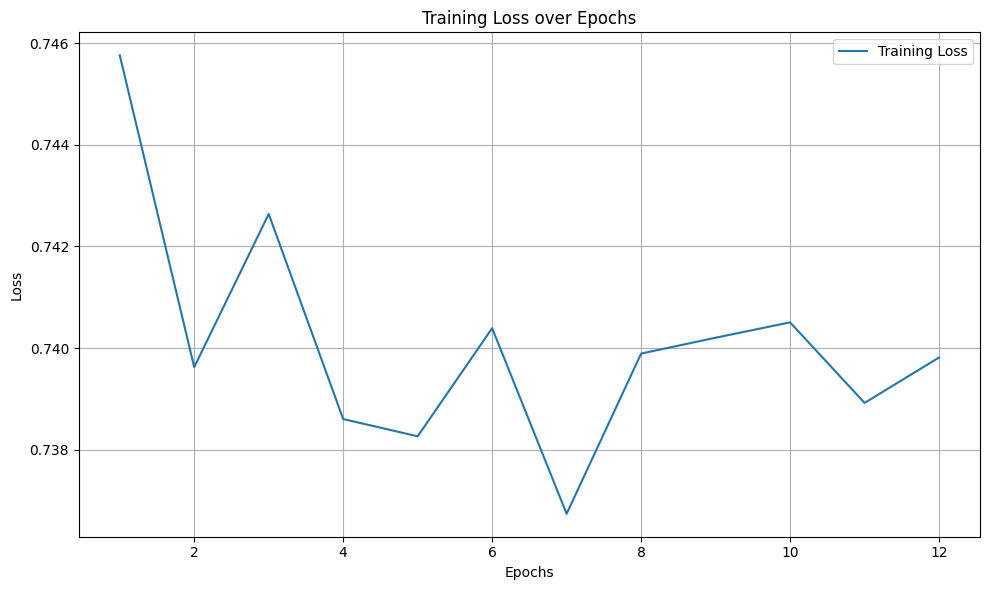

CNN-GRU Model Evaluation:
Mean Absolute Error (MAE): 5478.55
Root Mean Squared Error (RMSE): 8837.38
R^2 Score: -0.0243


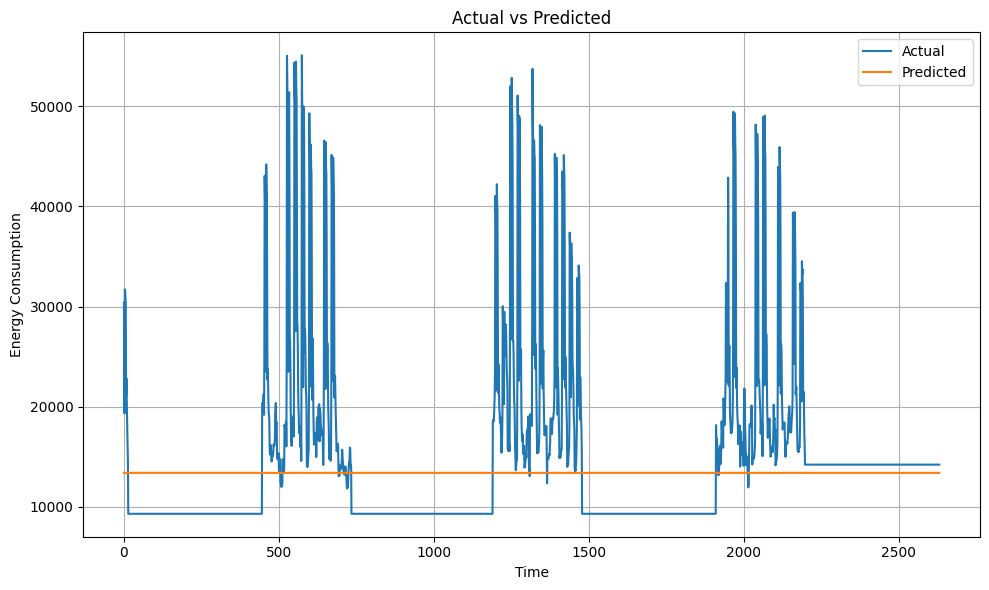


CNN-LSTM Model Evaluation:
Mean Absolute Error (MAE): 5478.55
Root Mean Squared Error (RMSE): 8837.38
R^2 Score: -0.0243


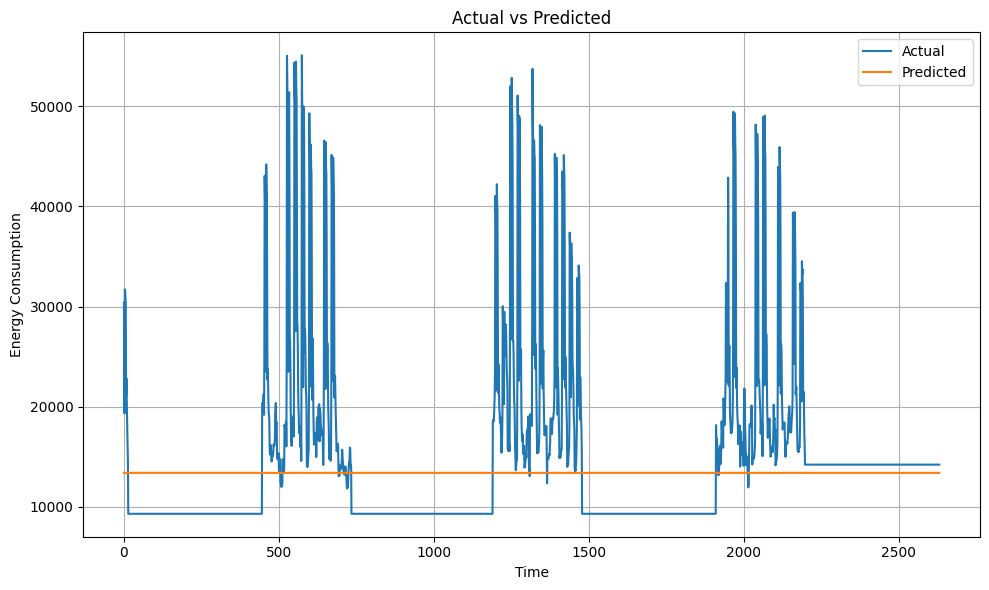

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd
import os

# Preprocessing and aggregation functions
def preprocess(file_path):
    # Load and parse dates
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    # Interpolate missing values linearly
    df = df.interpolate(method='linear')

    # Select only columns with 'kW' in their names for power consumption
    power_cols = [col for col in df.columns if 'kW' in col]
    df_power = df[power_cols]

    # Drop columns that are entirely NaN
    df_power = df_power.dropna(axis=1, how='all')

    # Resample to hourly and sum
    df_hourly = df_power.resample('H').sum()

    return df_hourly

def aggregate_building_data(directory, file_structure):
    building_data_combined = pd.DataFrame()

    for floor, files in file_structure.items():
        for file in files:
            file_path = os.path.join(directory, file)
            df_hourly = preprocess(file_path)

            # Sum power consumption across all zones for this file
            total_power_building = df_hourly.sum(axis=1)
            total_power_building.name = f'{floor}_total_building_kW'

            # Concatenate with existing data or initialize
            if building_data_combined.empty:
                building_data_combined = pd.DataFrame(total_power_building)
            else:
                building_data_combined = pd.concat([building_data_combined, total_power_building], axis=1)

    # Generate a complete date range from 01-07-2018 to 31-12-2019
    start_date = '2018-07-01'
    end_date = '2019-12-31'
    complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')

    # Reindex the combined dataframe to the complete date range
    building_data_combined = building_data_combined.reindex(complete_date_range)

    # Fill any remaining NaN values (if any) after reindexing
    building_data_combined.ffill(inplace=True)
    building_data_combined.bfill(inplace=True)

    # Sum across columns to get total power consumption of the building at each timestamp
    building_data_combined['total_building_kW'] = building_data_combined.sum(axis=1)

    # Z-score normalization
    scaler = StandardScaler()
    building_data_combined_scaled = scaler.fit_transform(building_data_combined[['total_building_kW']])
    building_data_combined_scaled = pd.DataFrame(building_data_combined_scaled, columns=['total_building_kW'], index=building_data_combined.index)

    # Add temporal features
    building_data_combined_scaled['hour'] = building_data_combined.index.hour
    building_data_combined_scaled['weekday'] = building_data_combined.index.weekday
    building_data_combined_scaled['month'] = building_data_combined.index.month

    return building_data_combined_scaled, scaler

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# Define CNN_GRU model
class CNN_GRU(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size):
        super(CNN_GRU, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.gru1 = nn.GRU(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=gru_hidden_size, batch_first=True)
        self.gru2 = nn.GRU(input_size=gru_hidden_size, hidden_size=gru_hidden_size, batch_first=True)
        self.fc = nn.Linear(gru_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.gru1(x)
        x, _ = self.gru2(x)
        x = self.fc(x[:, -1, :])
        x = self.sigmoid(x)  # Applying sigmoid activation
        return x

# Define CNN_LSTM model
class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size)
        self.flatten = nn.Flatten()
        self.lstm1 = nn.LSTM(input_size=(input_dim - cnn_kernel_size + 1) * cnn_out_channels, hidden_size=lstm_hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=lstm_hidden_size, hidden_size=lstm_hidden_size, batch_first=True)
        self.fc = nn.Linear(lstm_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.cnn(x))
        x = self.flatten(x)
        x = x.unsqueeze(1)
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.fc(x[:, -1, :])
        x = self.sigmoid(x)  # Applying sigmoid activation
        return x

# Function to train the model
def train_model(model, train_loader, epochs=50, lr=0.01, patience=5):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []  # To store training losses

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)  # Store the average loss for this epoch
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(model.state_dict(), 'best_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to evaluate the model
def evaluate_model(model, test_loader, scaler):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    # Inverse transform predictions and actuals
    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    # Calculate evaluation metrics
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R^2 Score: {r2:.4f}')

    # Plot predictions vs actuals
    plt.figure(figsize=(10, 6))
    plt.plot(actuals, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title('Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    directory = '/content/drive/MyDrive/CU_BEMS_Dataset'
    file_structure = {
        'Floor1': ['2018Floor1.csv', '2019Floor1.csv'],
        'Floor2': ['2018Floor2.csv', '2019Floor2.csv'],
        'Floor3': ['2018Floor3.csv', '2019Floor3.csv'],
        'Floor4': ['2018Floor4.csv', '2019Floor4.csv'],
        'Floor5': ['2018Floor5.csv', '2019Floor5.csv'],
        'Floor6': ['2018Floor6.csv', '2019Floor6.csv'],
        'Floor7': ['2018Floor7.csv', '2019Floor7.csv'],
    }
    building_hourly_consumption, scaler = aggregate_building_data(directory, file_structure)

    # Aggregate building data and scaling
    building_data_combined_scaled, scaler = aggregate_building_data(directory, file_structure)

    # Separate features and target
    X = building_data_combined_scaled[['total_building_kW', 'hour', 'weekday', 'month']].values
    y = building_data_combined_scaled['total_building_kW'].values

    # Split data into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create custom datasets and data loaders
    train_dataset = CustomDataset(X_train, y_train)
    test_dataset = CustomDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    # Define model parameters
    input_dim = X.shape[1]  # Number of input features
    cnn_out_channels = 16
    cnn_kernel_size = 3
    gru_hidden_size = 100
    lstm_hidden_size = 100

    # Initialize models
    cnn_gru_model = CNN_GRU(input_dim, cnn_out_channels, cnn_kernel_size, gru_hidden_size)
    cnn_lstm_model = CNN_LSTM(input_dim, cnn_out_channels, cnn_kernel_size, lstm_hidden_size)

    # Train models
    train_model(cnn_gru_model, train_loader)
    train_model(cnn_lstm_model, train_loader)

    # Evaluate models
    print("CNN-GRU Model Evaluation:")
    evaluate_model(cnn_gru_model, test_loader, scaler)
    print("\nCNN-LSTM Model Evaluation:")
    evaluate_model(cnn_lstm_model, test_loader, scaler)

if __name__ == '__main__':
    main()
